# Dataset Overview

## Context:
* Customer Personality Analysis involves a detailed examination of a company’s ideal customers. This analysis helps businesses to better understand their customer base, enabling them to tailor products according to the specific needs, behaviors, and concerns of different customer segments.
* By understanding customer personalities, a company can strategically target its marketing efforts. For example, instead of marketing a new product to every customer, the company can identify the customer segment most likely to purchase the product and focus its marketing efforts on that segment.

## Attributes:

### People:
* **ID:** Customer's unique identifier.
* **Year_Birth:** Customer's birth year.
* **Education:** Customer's education level.
* **Marital_Status:** Customer's marital status.
* **Income:** Customer's yearly household income.
* **Kidhome:** Number of children in the customer's household.
* **Teenhome:** Number of teenagers in the customer's household.
* **Dt_Customer:** Date of customer's enrollment with the company.
* **Recency:** Number of days since the customer's last purchase.
* **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise.

### Products:
* **MntWines:** Amount spent on wine in the last 2 years.
* **MntFruits:** Amount spent on fruits in the last 2 years.
* **MntMeatProducts:** Amount spent on meat in the last 2 years.
* **MntFishProducts:** Amount spent on fish in the last 2 years.
* **MntSweetProducts:** Amount spent on sweets in the last 2 years.
* **MntGoldProds:** Amount spent on gold in the last 2 years.

### Promotion:
* **NumDealsPurchases:** Number of purchases made with a discount.
* **AcceptedCmp1:** 1 if the customer accepted the offer in the 1st campaign, 0 otherwise.
* **AcceptedCmp2:** 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise.
* **AcceptedCmp3:** 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise.
* **AcceptedCmp4:** 1 if the customer accepted the offer in the 4th campaign, 0 otherwise.
* **AcceptedCmp5:** 1 if the customer accepted the offer in the 5th campaign, 0 otherwise.
* **Response:** 1 if the customer accepted the offer in the last campaign, 0 otherwise.

### Place:
* **NumWebPurchases:** Number of purchases made through the company’s website.
* **NumCatalogPurchases:** Number of purchases made using a catalogue.
* **NumStorePurchases:** Number of purchases made directly in stores.
* **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.

## Problem Statement:
* **Objective:** The goal is to perform clustering to summarize customer segments.


## **Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

## **Loading Datset**

In [5]:
df = pd.read_csv('/content/marketing_campaign.csv',sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [8]:
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


## **Exploratory Data Analysis**

In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [10]:
df.shape

(2240, 29)

In [11]:
df.size

64960

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [14]:
df.isnull().sum()
## income has null values

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [15]:
df.duplicated().sum()

0

In [19]:
df.select_dtypes(include='number').skew()

,0
ID,0.039832
Year_Birth,-0.349944
Income,6.763487
Kidhome,0.635288
Teenhome,0.407115
Recency,-0.001987
MntWines,1.175771
MntFruits,2.102063
MntMeatProducts,2.083233
MntFishProducts,1.919769


In [21]:
# Drop non-numeric columns before calculating correlations
x = df.drop(['Z_CostContact','Z_Revenue'],axis = 1)
numeric_x = x.select_dtypes(include='number') # Select only numeric columns
numeric_x.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,0.111331


## **Basic data cleaning**

In [22]:
df.dropna(inplace = True)

### Calculating age by year of birth since age is useful in classification

In [23]:
df["Year_Birth"] = 2021-df["Year_Birth"]

### combining all amount spent in entire 2 years

In [24]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [25]:
df.drop(['Z_CostContact','Z_Revenue'],axis = 1,inplace = True)

In [26]:
df.rename(columns = {'Year_Birth':'Age'},inplace = True)
df

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent
0,5524,64,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,1,1617
1,2174,67,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,0,27
2,4141,56,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,0,776
3,6182,37,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,0,53
4,5324,40,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,54,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,4,5,0,0,0,0,0,0,0,1341
2236,4001,75,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,5,7,0,0,0,1,0,0,0,444
2237,7270,40,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,13,6,0,1,0,0,0,0,0,1241
2238,8235,65,Master,Together,69245.0,0,1,24-01-2014,8,428,...,10,3,0,0,0,0,0,0,0,843


## **Data visualisation**

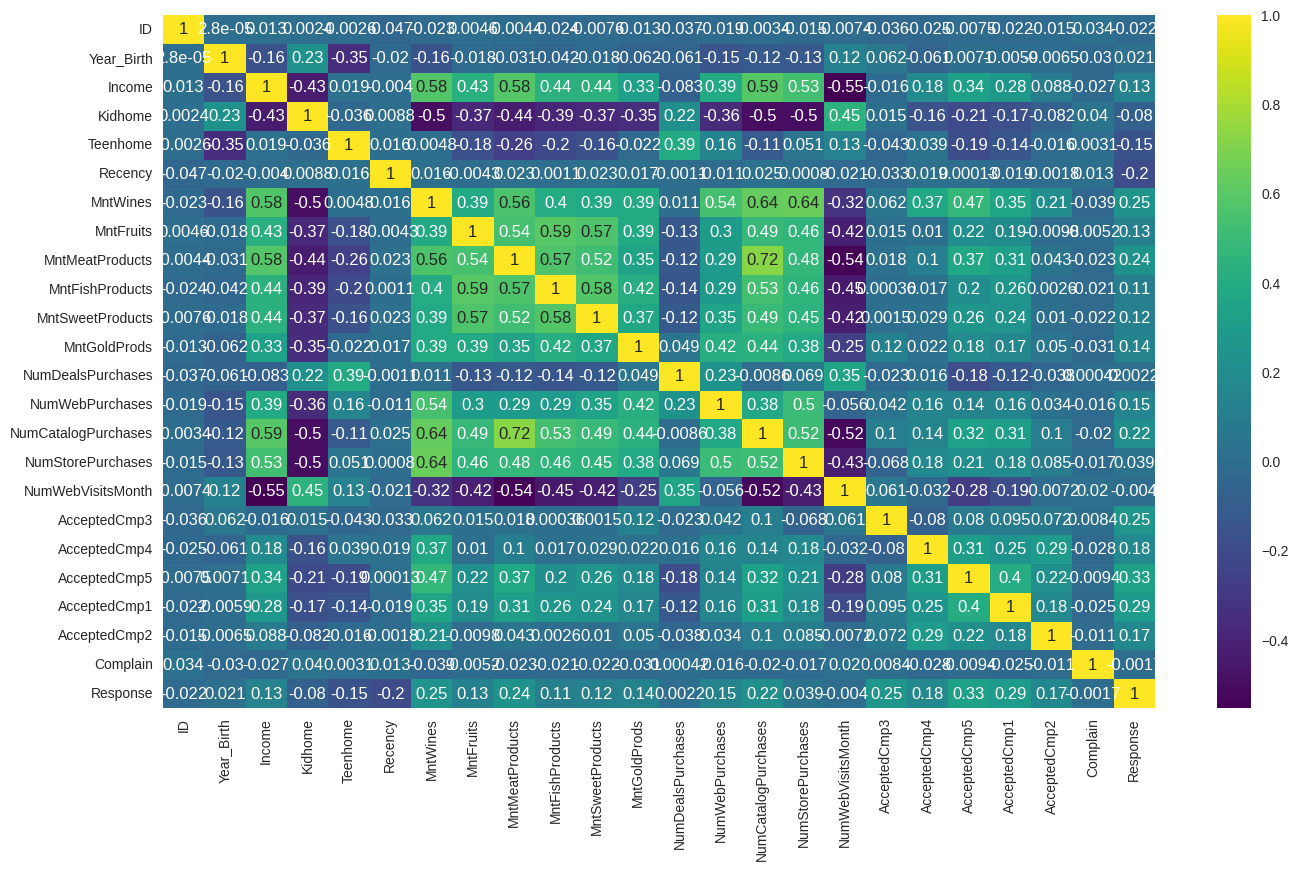

In [28]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(x.select_dtypes(include='number').corr(),annot = True,cmap = 'viridis')
plt.show()

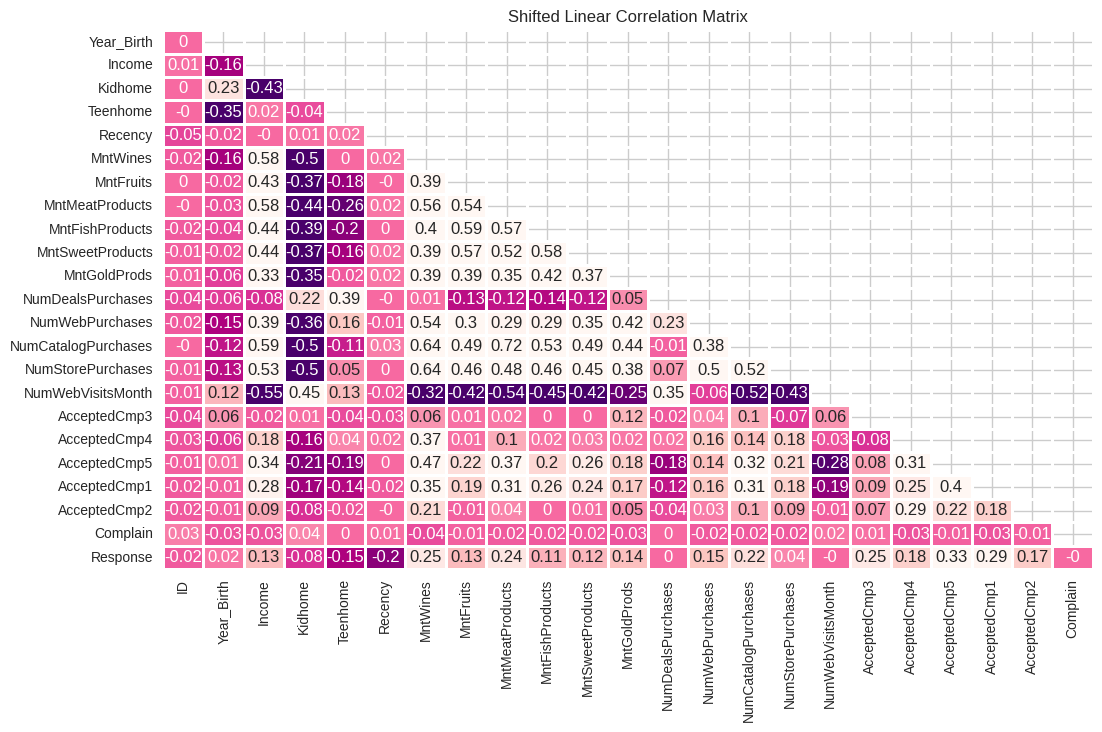

In [30]:
''' Plot a Shifted Correlation Matrix '''
# Diagonal correlation is always unity & less relevant, shifted variant shows only relevant cases
def corrMat(df,id=False):

    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0,
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.set_title('Shifted Linear Correlation Matrix')

corrMat(numeric_x)

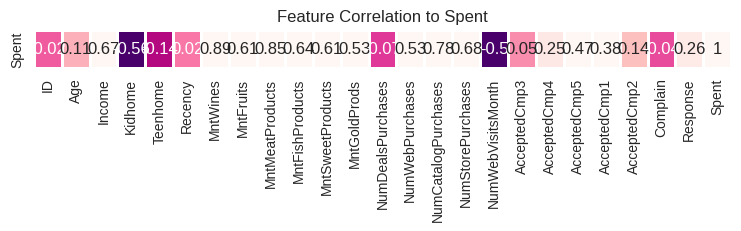

In [31]:
'''Plot Correlation to Target Variable only'''
def corrMat2(df,target='Spent',figsize=(9,0.5),ret_id=False):

    corr_mat = df.corr().round(2);shape = corr_mat.shape[0]
    corr_mat = corr_mat.transpose()
    corr = corr_mat.loc[:, df.columns == target].transpose().copy()
    if(ret_id is False):
        f, ax = plt.subplots(figsize=figsize)
        sns.heatmap(corr,vmin=-0.3,vmax=0.3,center=0,
                     cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
        plt.title(f'Feature Correlation to {target}')

    if(ret_id):
        return corr
corrMat2(df.drop(['Education','Marital_Status','Dt_Customer'],axis = 1))

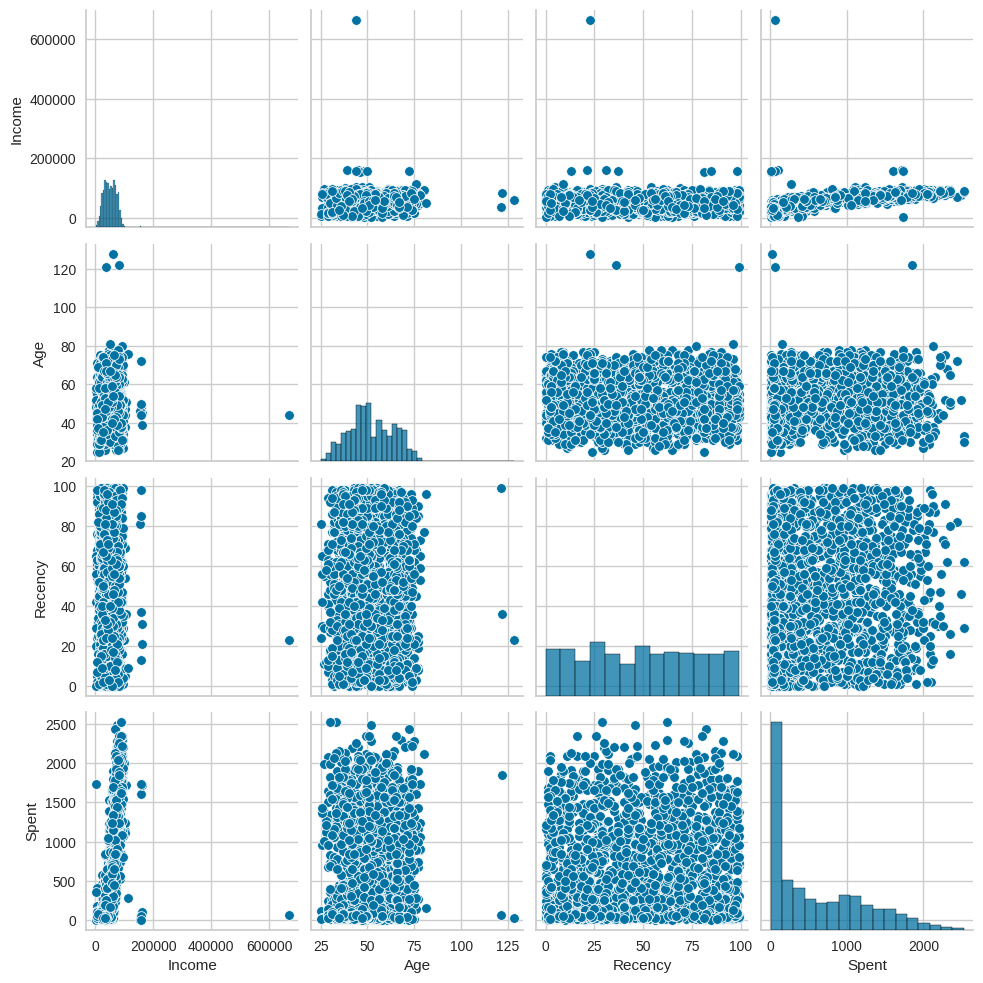

In [32]:
sns.pairplot(df[['Income','Age','Recency','Spent','Marital_Status']])

In [33]:
df['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


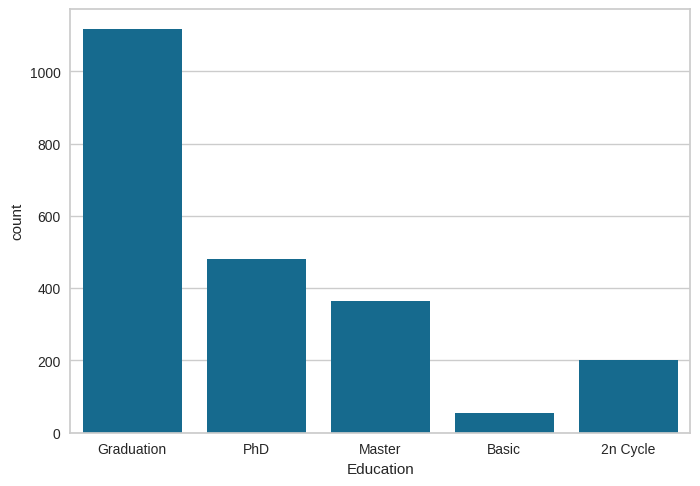

In [34]:
sns.countplot(x = 'Education' , data = df)
plt.show()
# basic are less in numbered

In [35]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


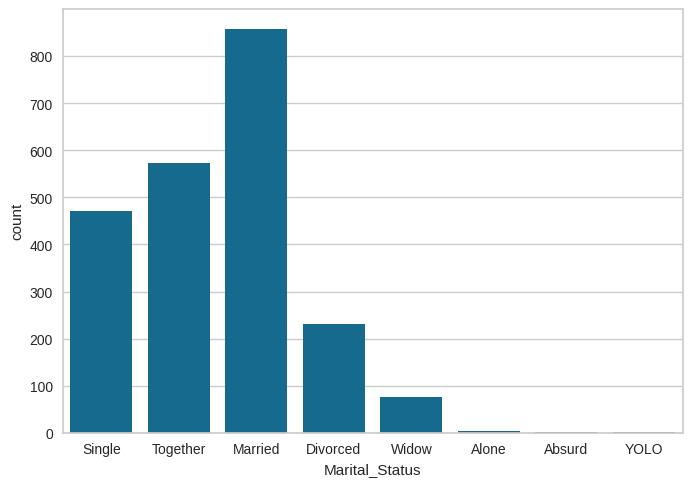

In [36]:
sns.countplot( x = 'Marital_Status',data = df)
plt.show()
# Widow,Alone,Absurd,Yolo are less in numbered

In [37]:
obj = ['Education','Marital_Status']

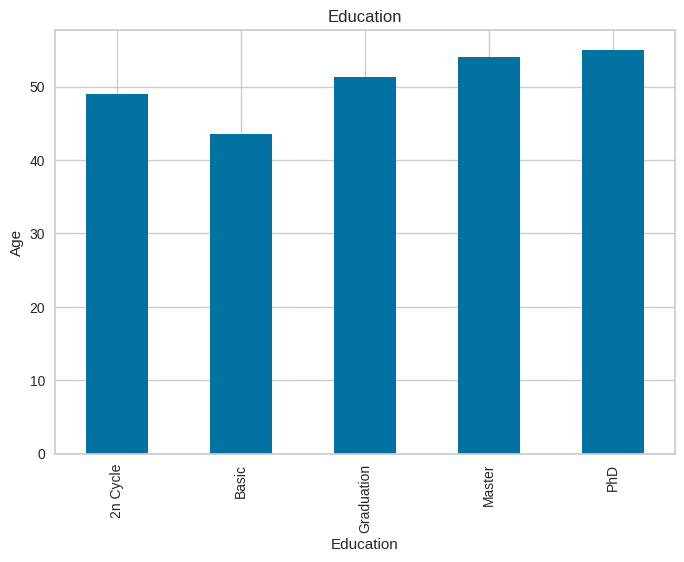

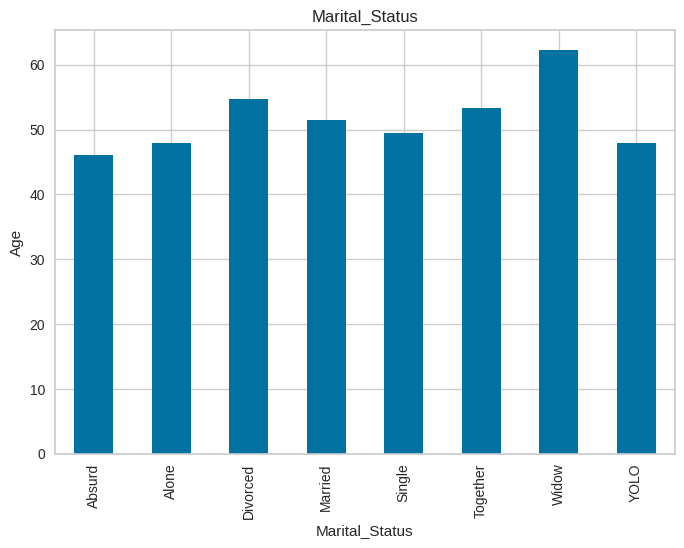

In [38]:
for i in obj:
    data=df.copy()
    data.groupby(i)['Age'].mean().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Age')
    plt.title(i)
    plt.show()

# average age is above 50 for people doing masters,PhD,Graduation
# average age of basic is lessthan all other features below 50
# average age of wiodows are high above 60
# average age of absurd yolo single and alone below 50

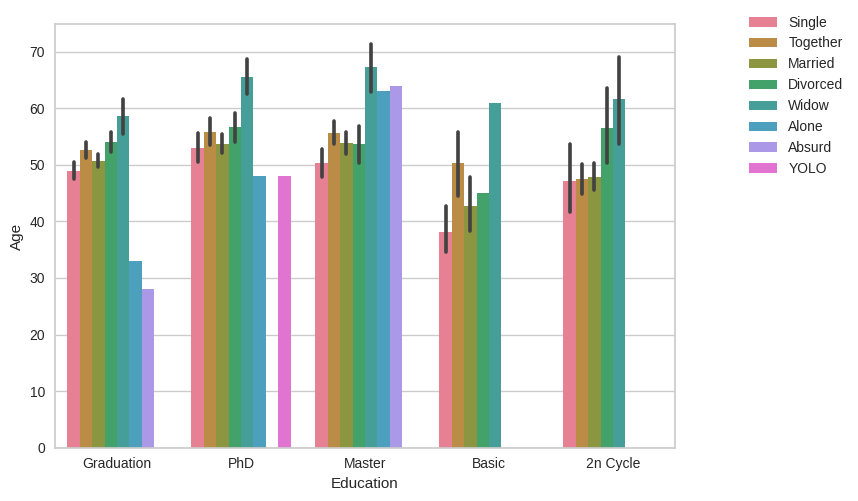

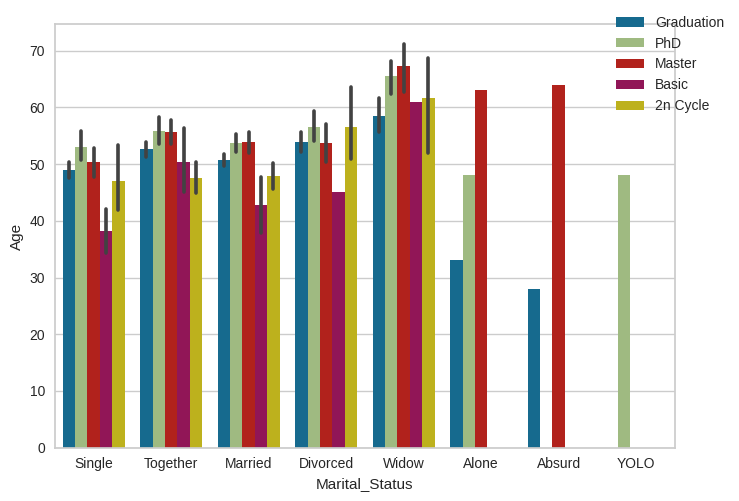

In [39]:
# I found no relations
for i in range(len(obj)):
    for j in range(2):
        x = obj[i]
        if obj[j] != x:
            sns.barplot(x= x,y='Age',hue=obj[j],data=df)
            plt.legend(bbox_to_anchor=(1.1, 1.05))
            plt.show()

In [40]:
df7 = df.copy()

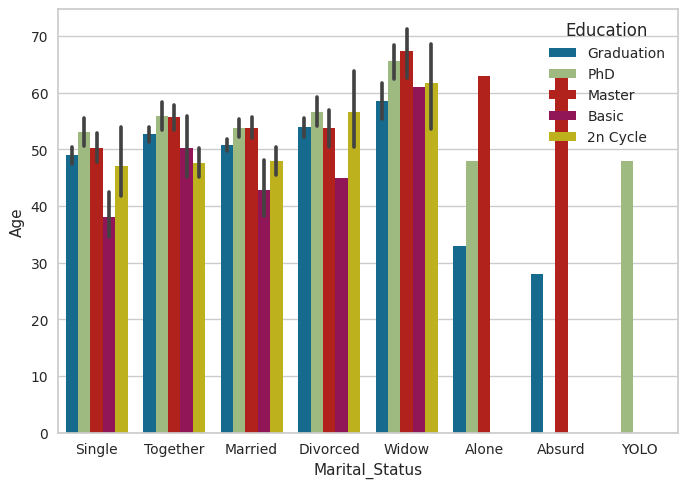

In [41]:
for i in range(len(obj)):
    x='Marital_Status'
    for j in range(1):
        if obj[i] != x:
            sns.barplot(x= x,y='Age',hue=obj[i],data=df7)
            sns.set(rc={'figure.figsize':(11,12)})
            plt.show()

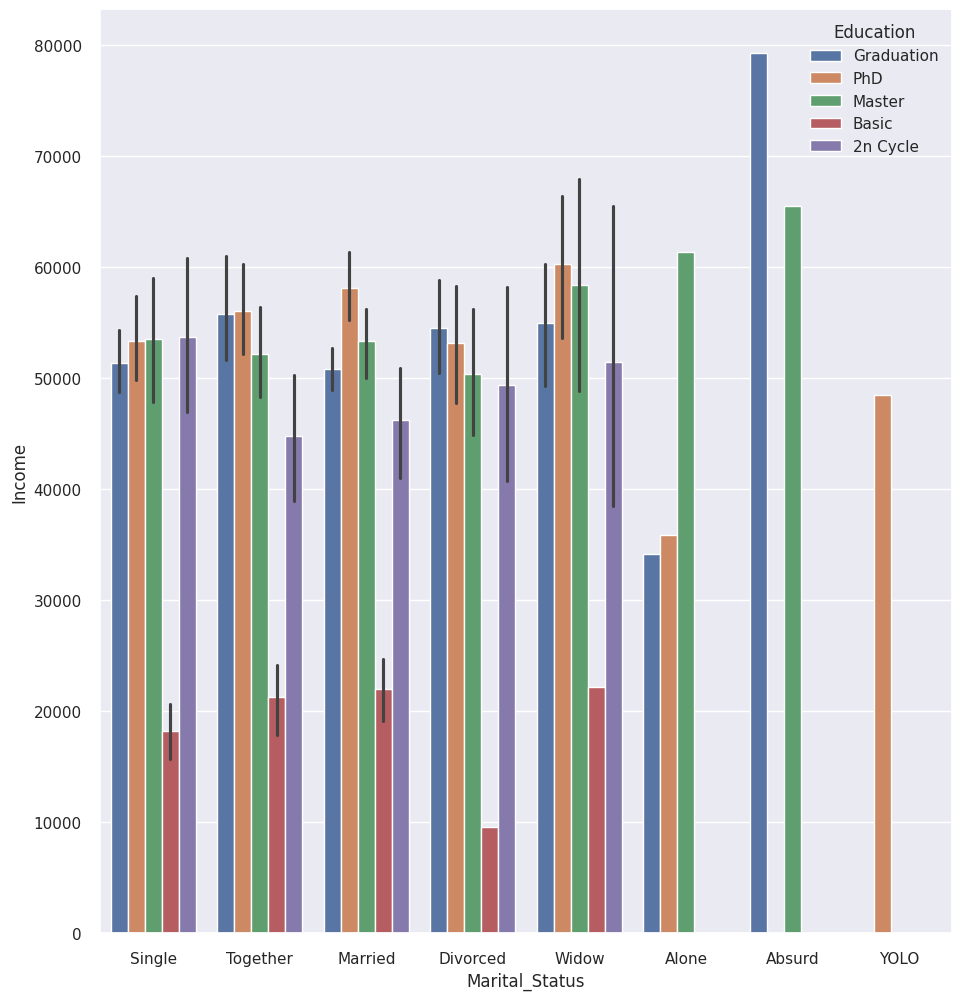

In [42]:
for i in range(len(obj)):
    x='Marital_Status'
    for j in range(1):
        if obj[i] != x:
            sns.barplot(x= x,y='Income',hue=obj[i],data=df7)
            sns.set(rc={'figure.figsize':(11,12)})
            plt.show()



*   In single there are more number of people who do PhD less number of people who do basic and average age is between 40-50
*   In together it is alomost equal number of doing PhD and Masters less number of people who do 2n cycle and average age is between 50-60
*   In married it is alomost equal number of doing PhD and Masters less number of people who do basic and average age is between 40-50
*   In divorced it is alomost equal number of doing PhD and 2ncylce less number of people who do basic and average age is between 50 - 60
*   In widow more number of people do masters and less number of people do graduation and average age is between 60-70
*   In alone there is only 3 categories graduation,PhD,masters and they do masters more and 2ncycle less average age is 40-50
*   In absurd there is only 2 categories masters,graduation and people doing masters are more average age is 40-50
*   In yolo only in category PhD


This is useful for classification

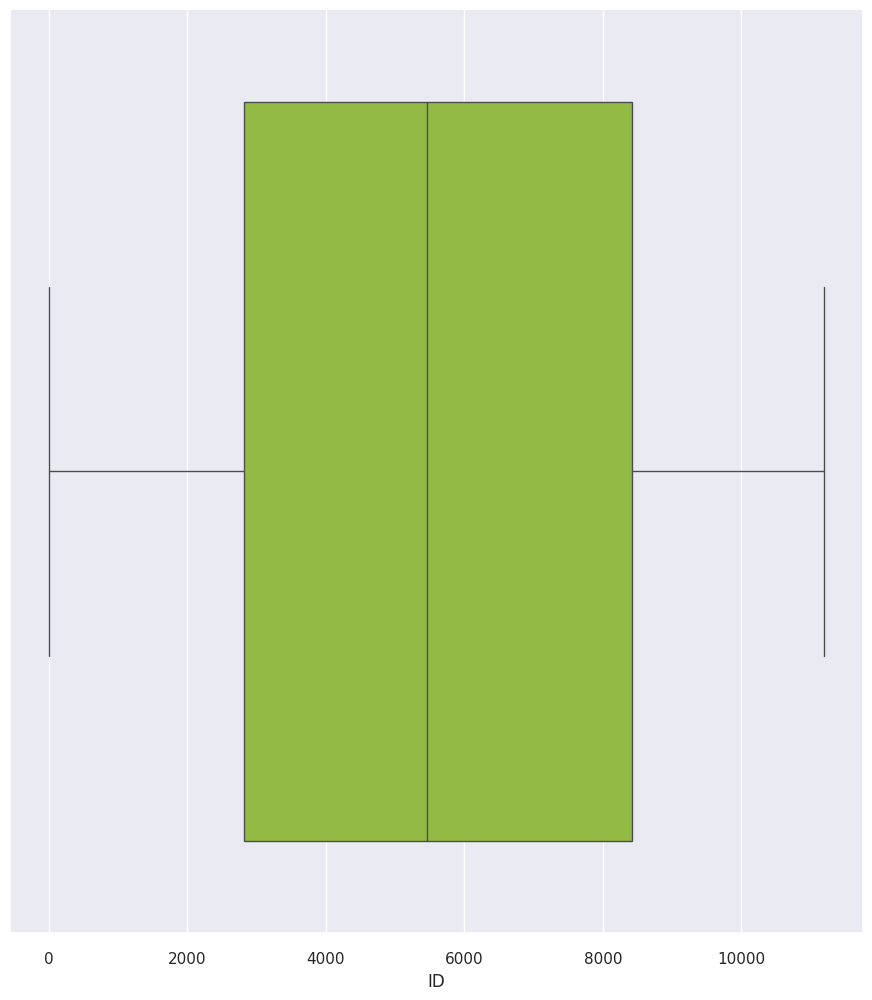

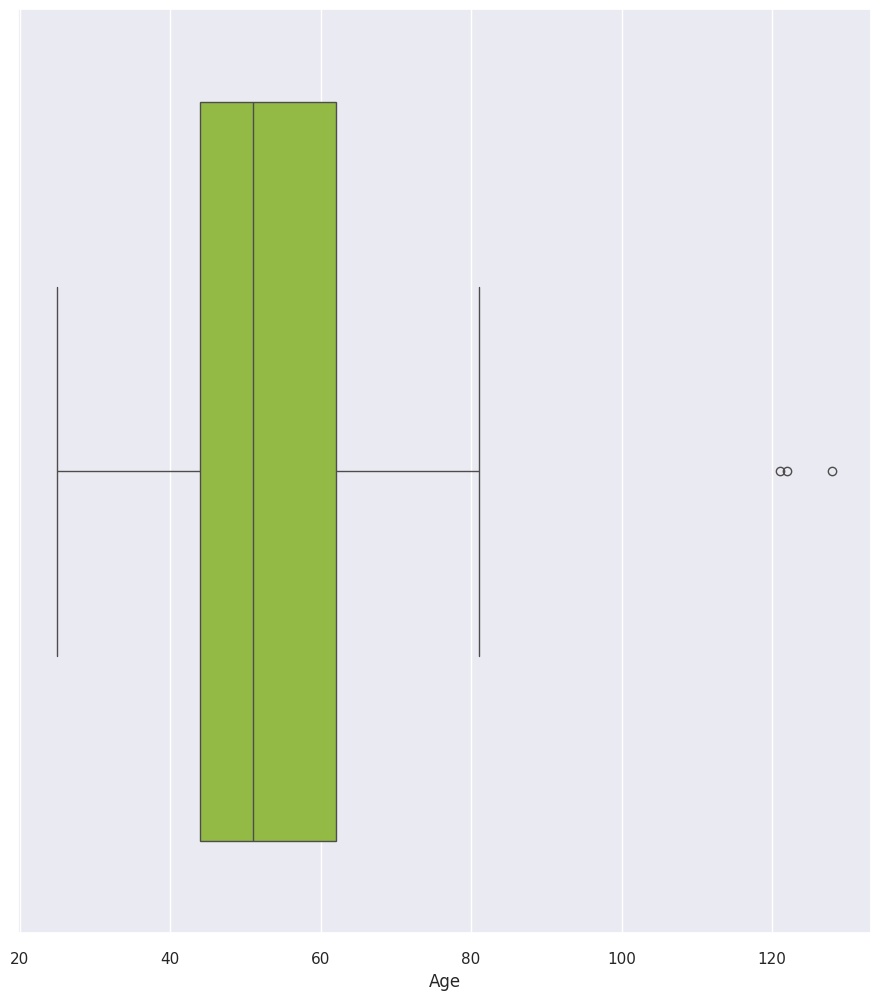

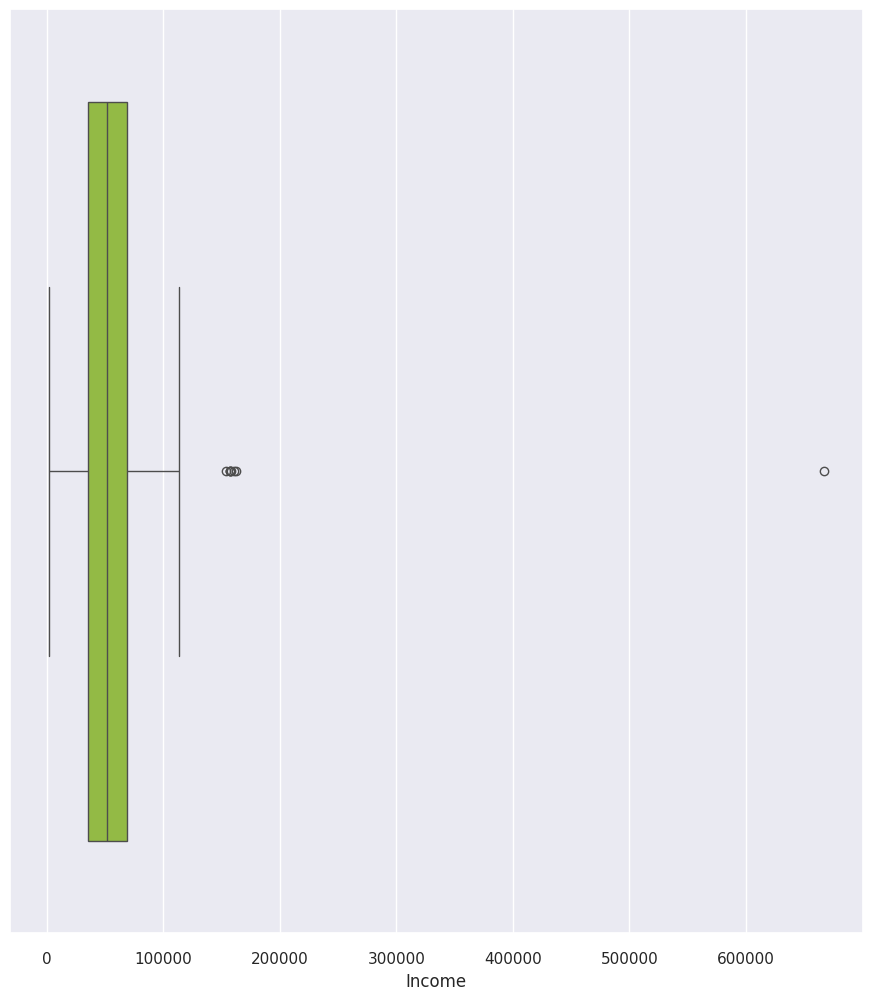

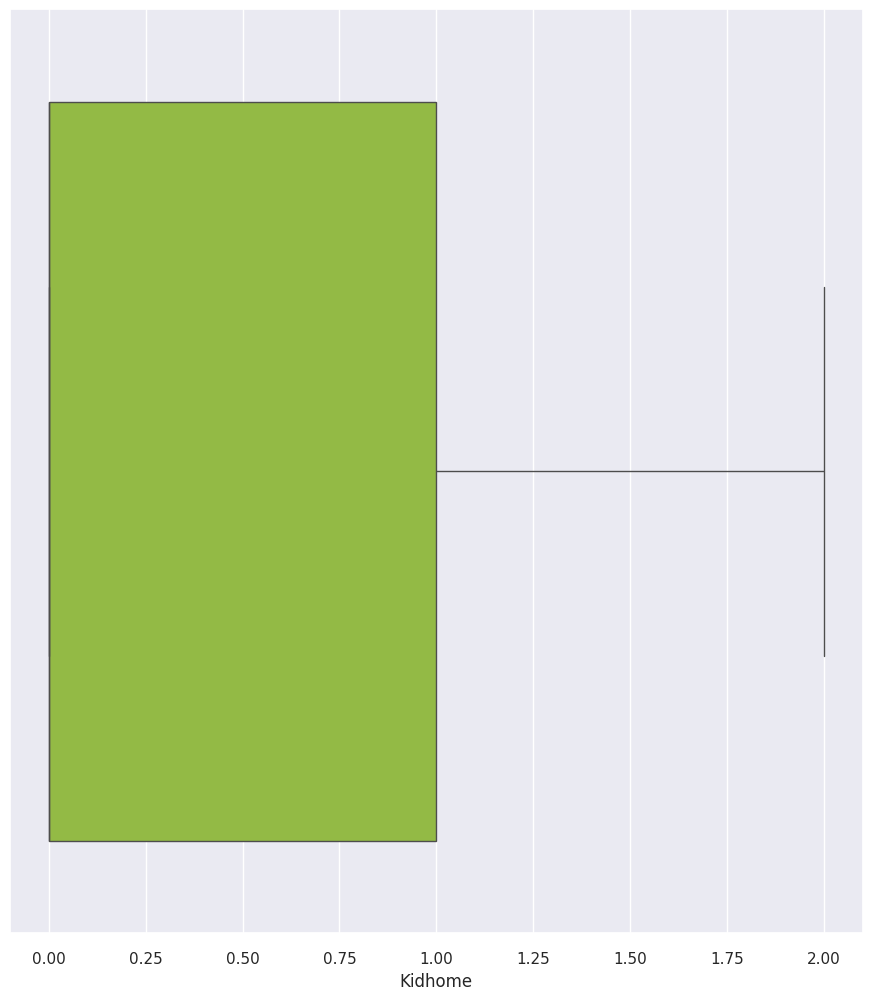

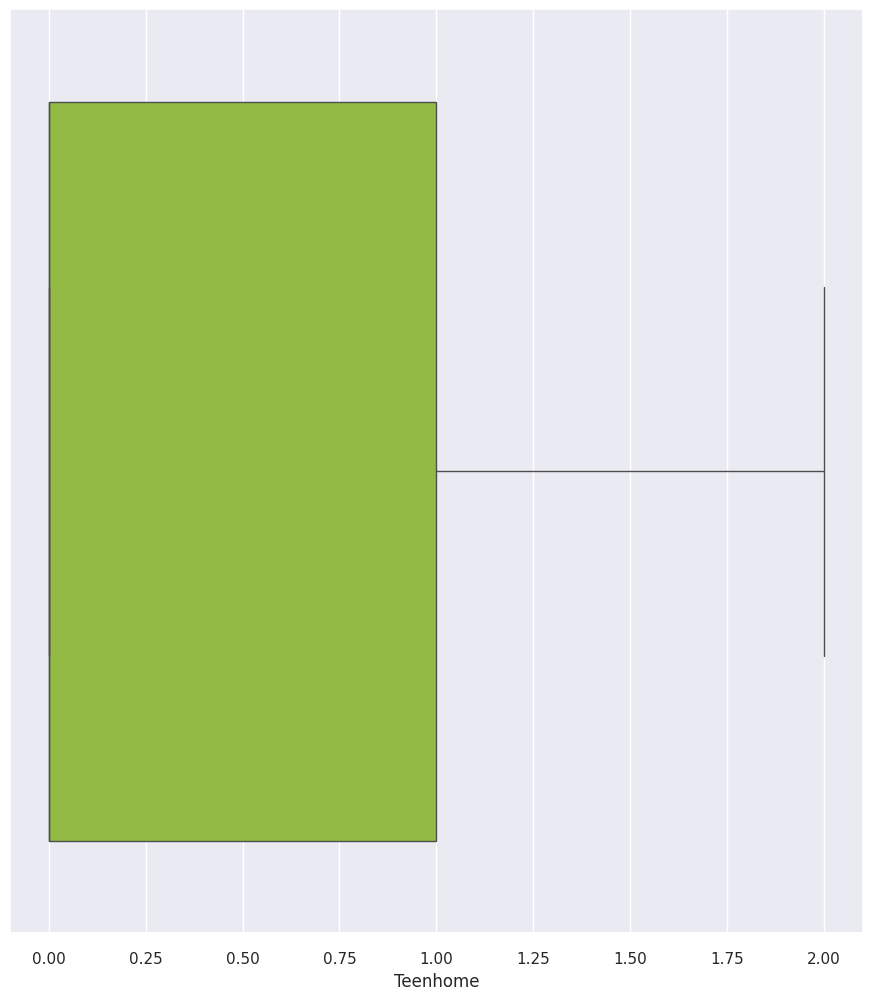

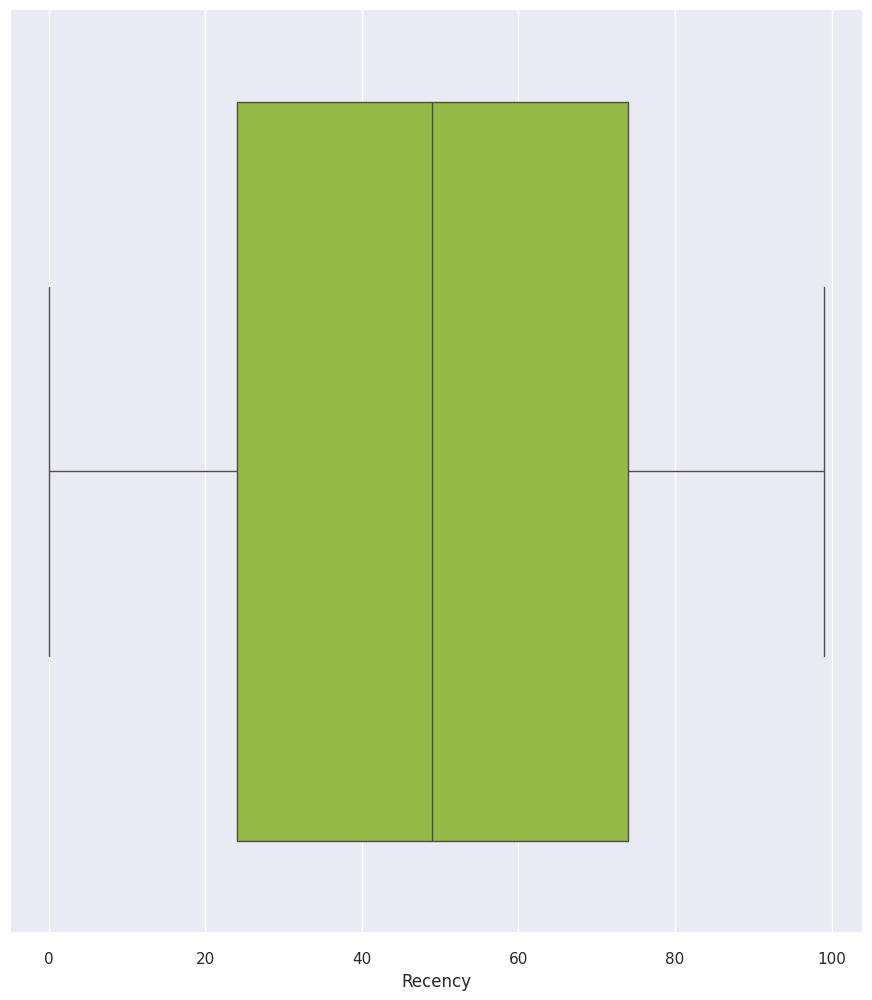

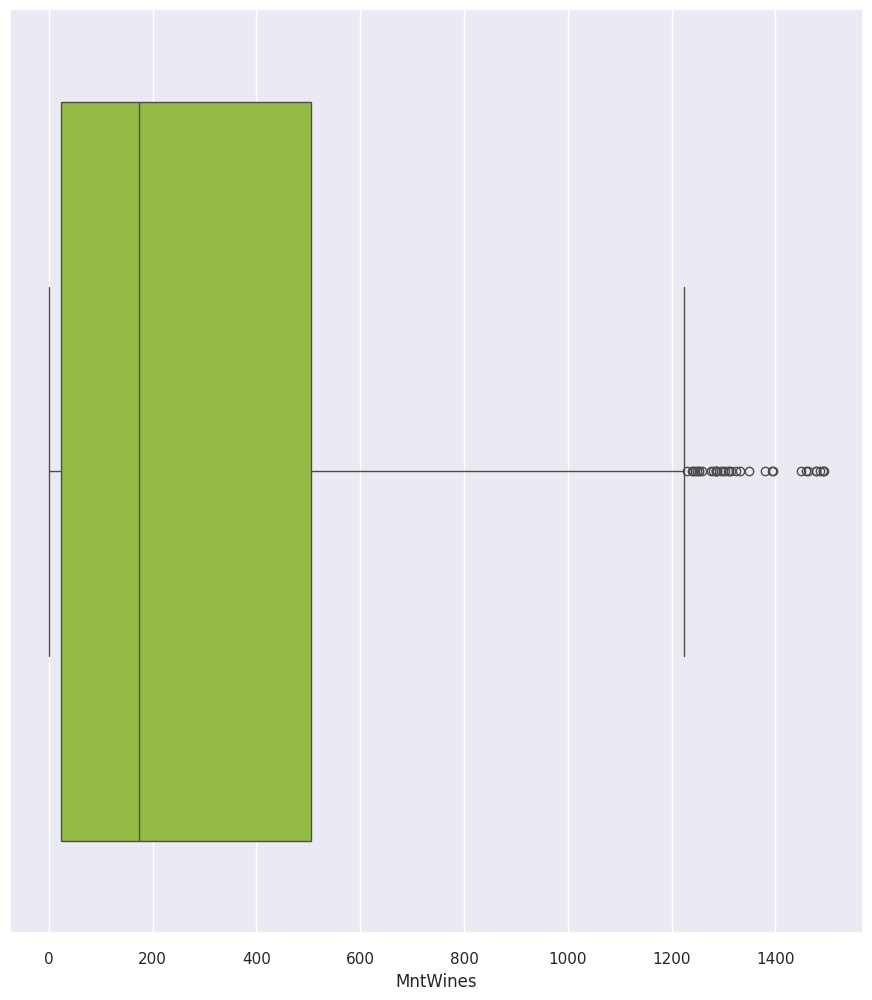

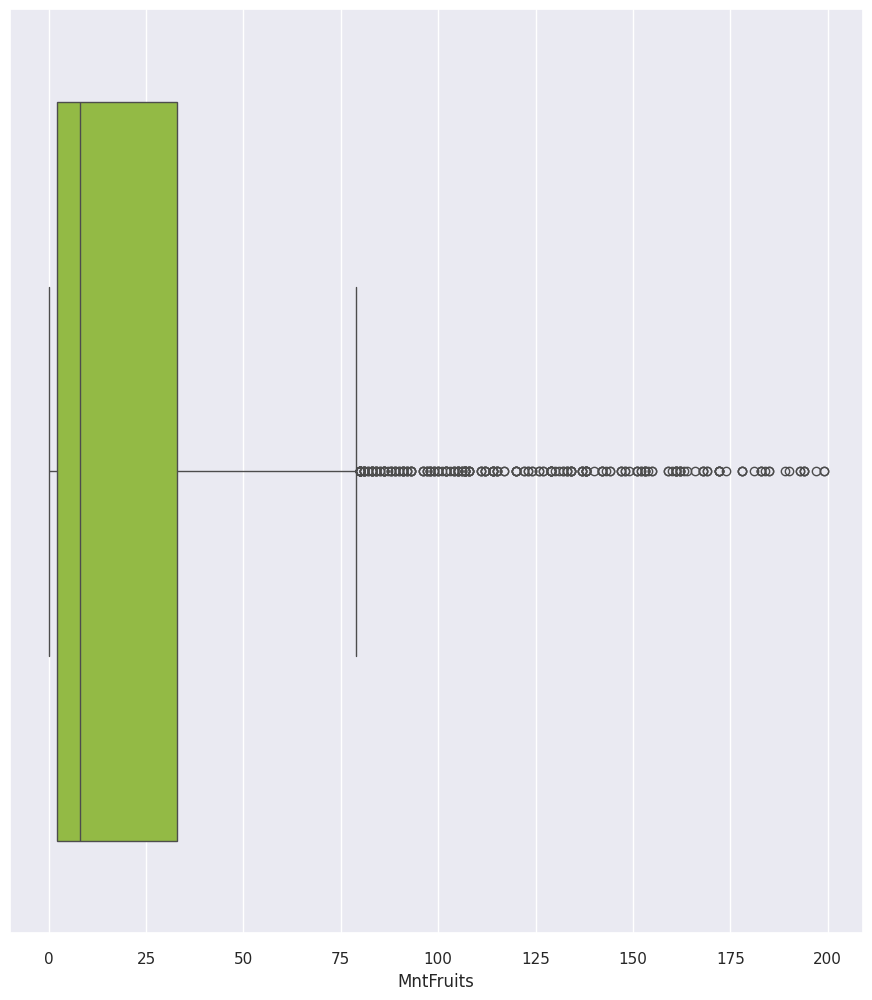

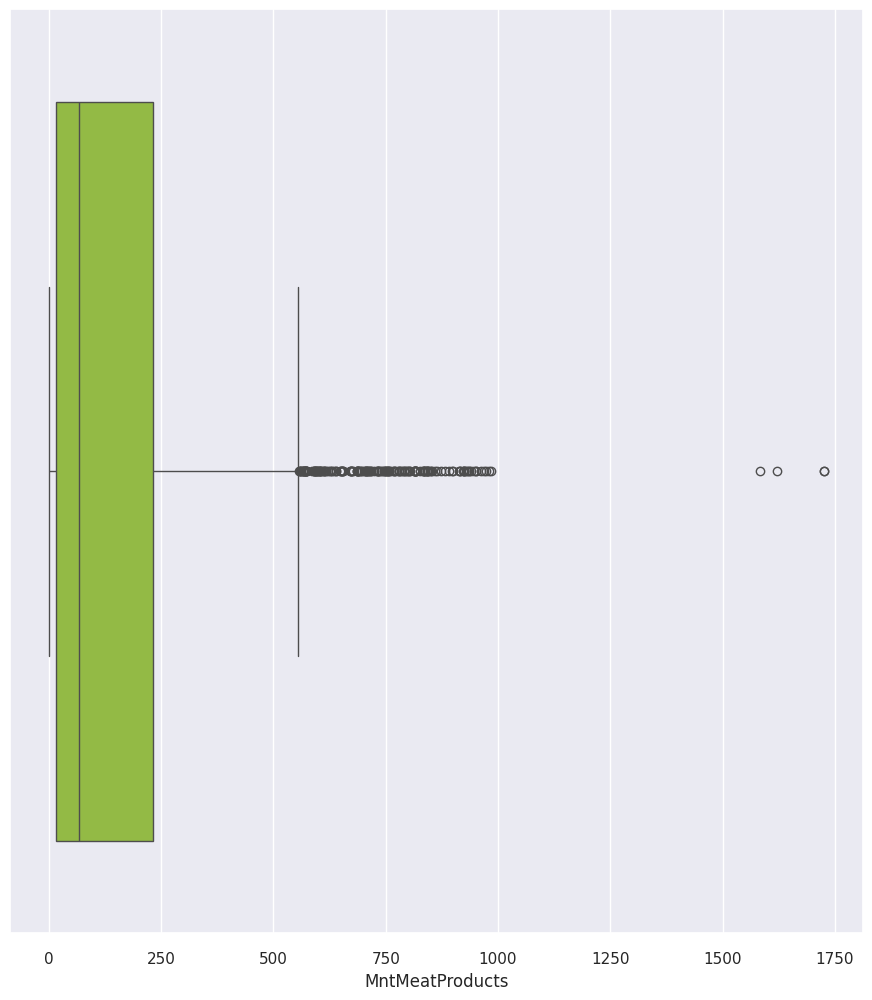

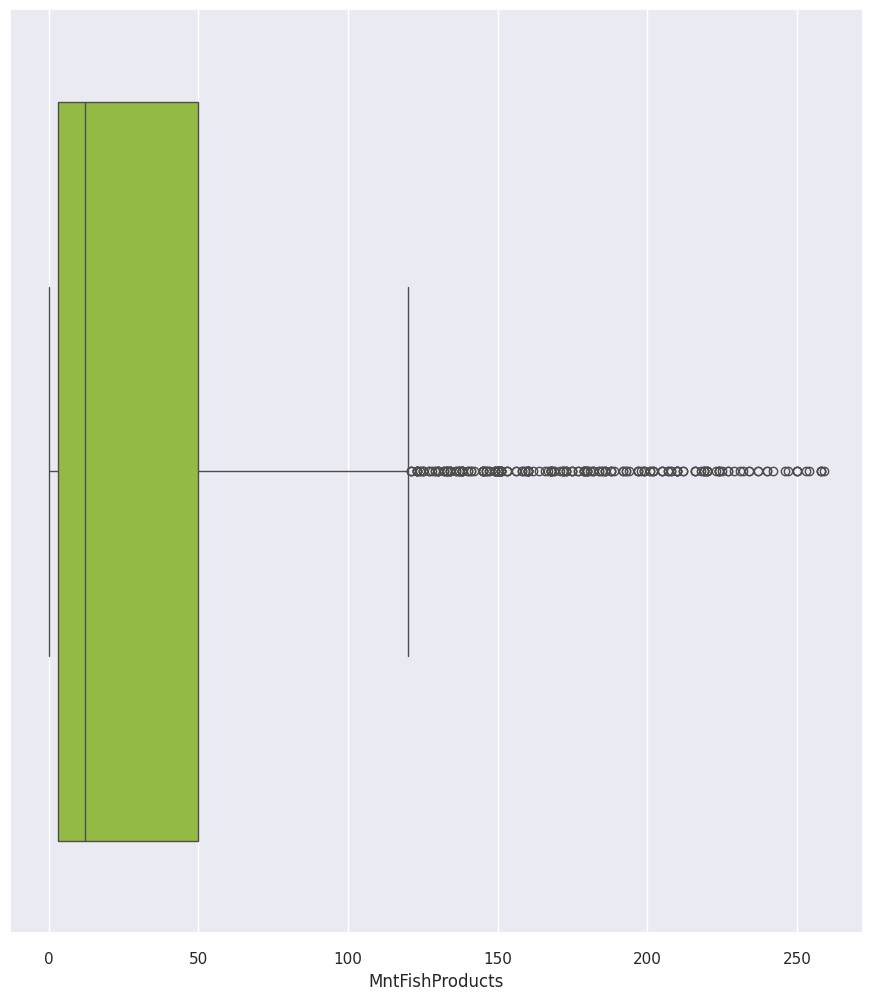

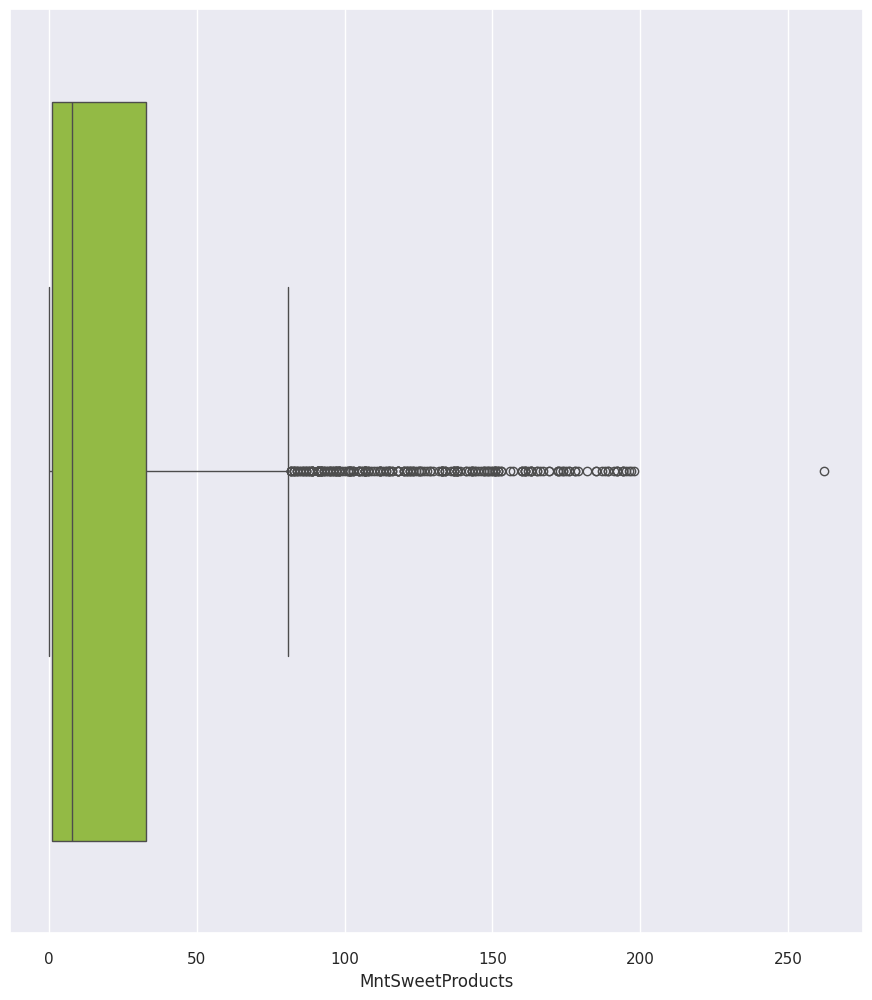

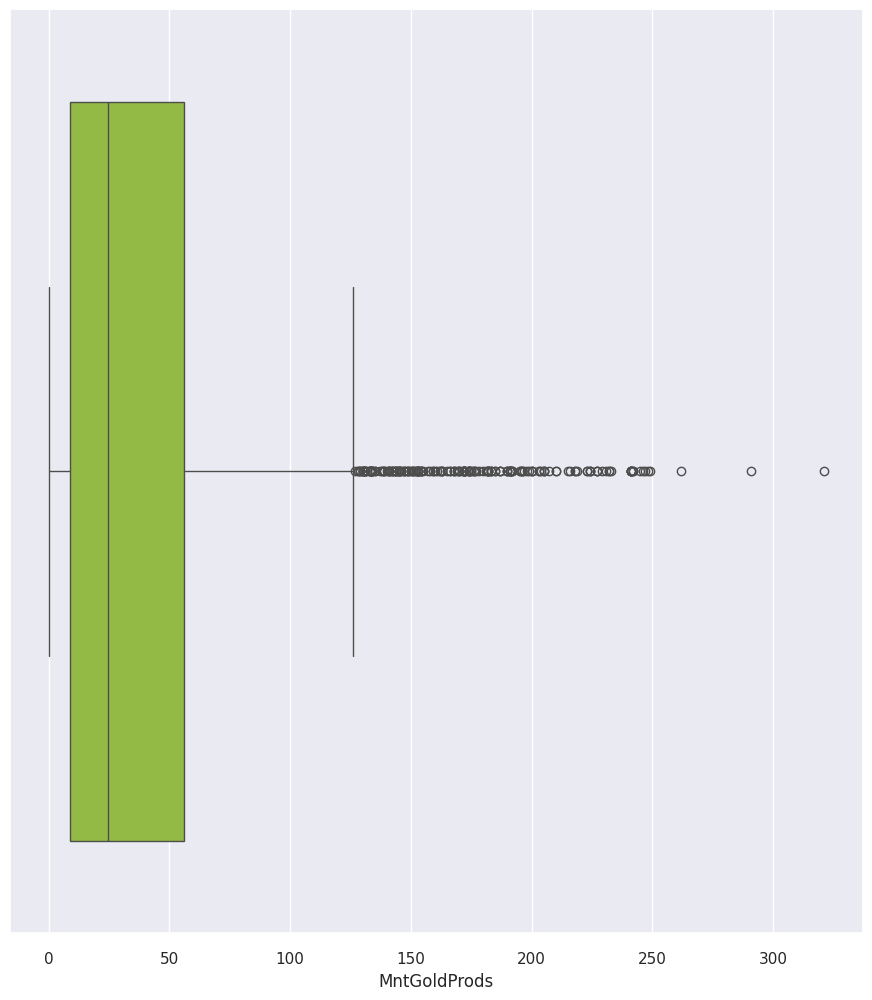

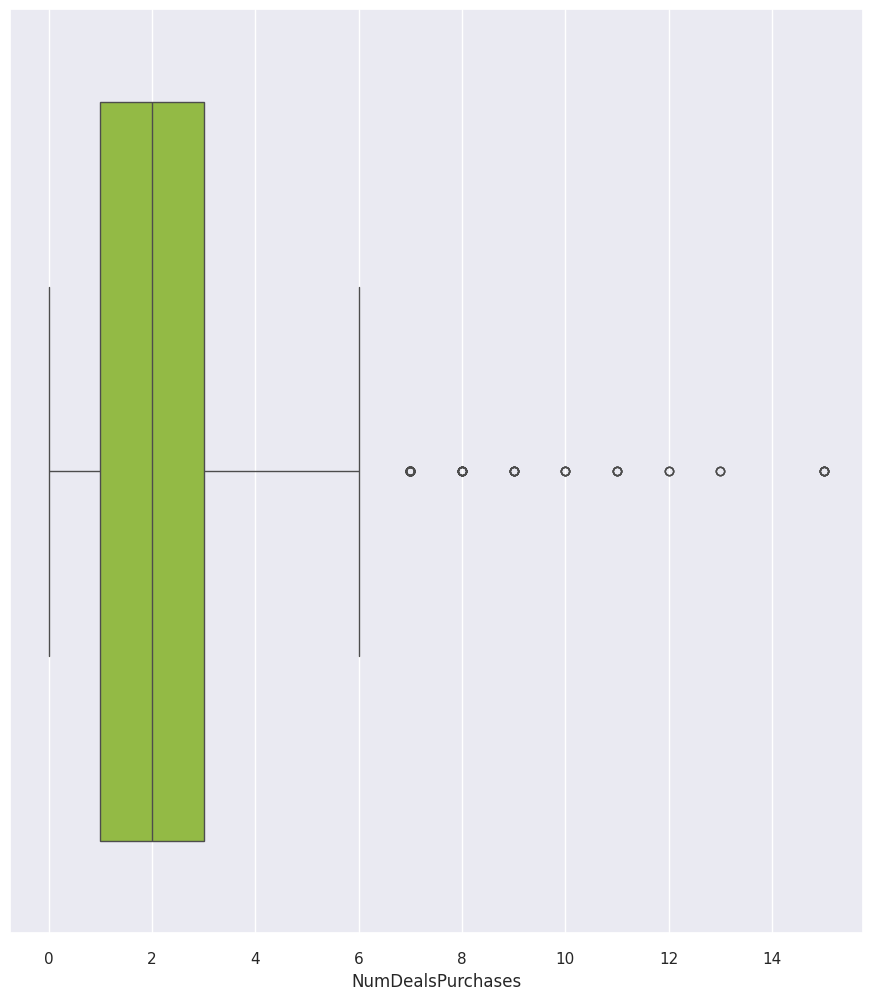

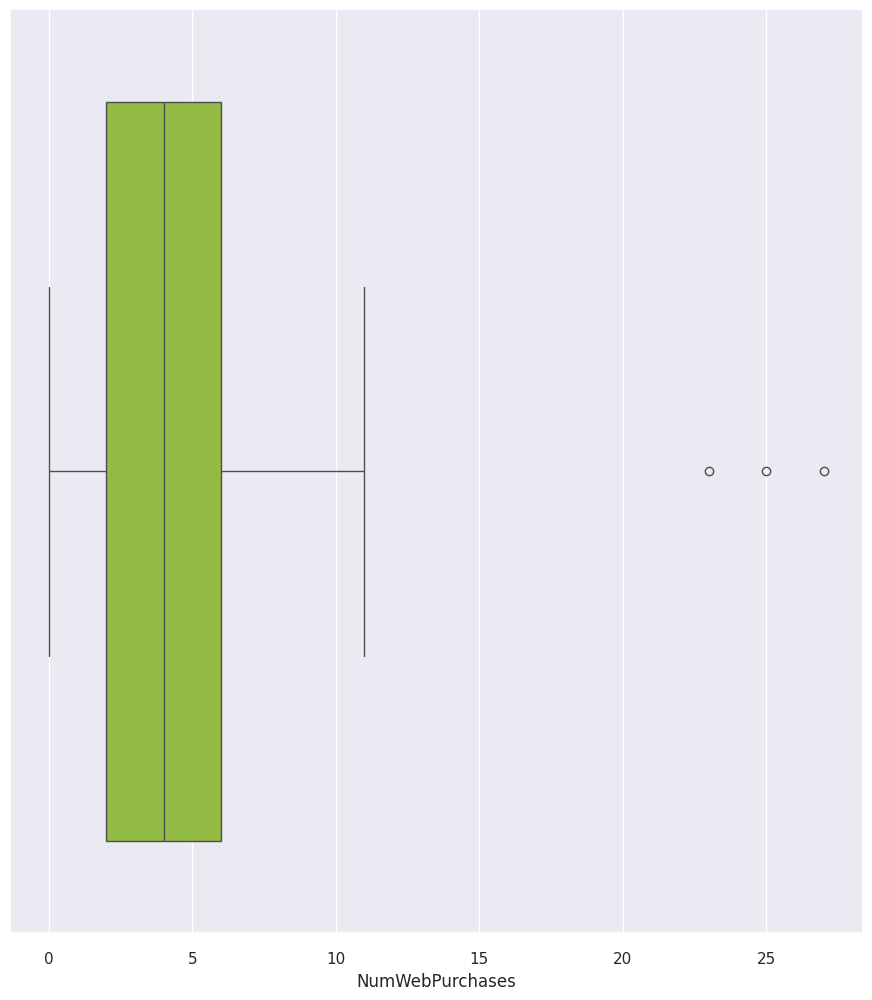

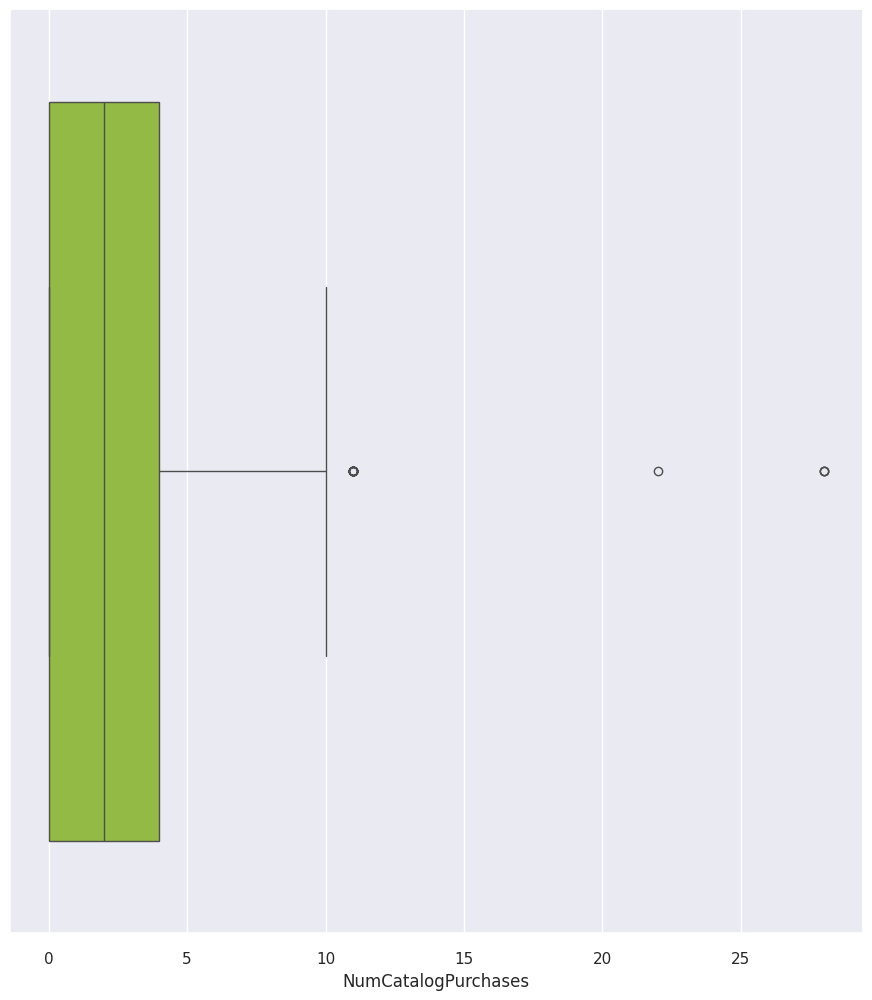

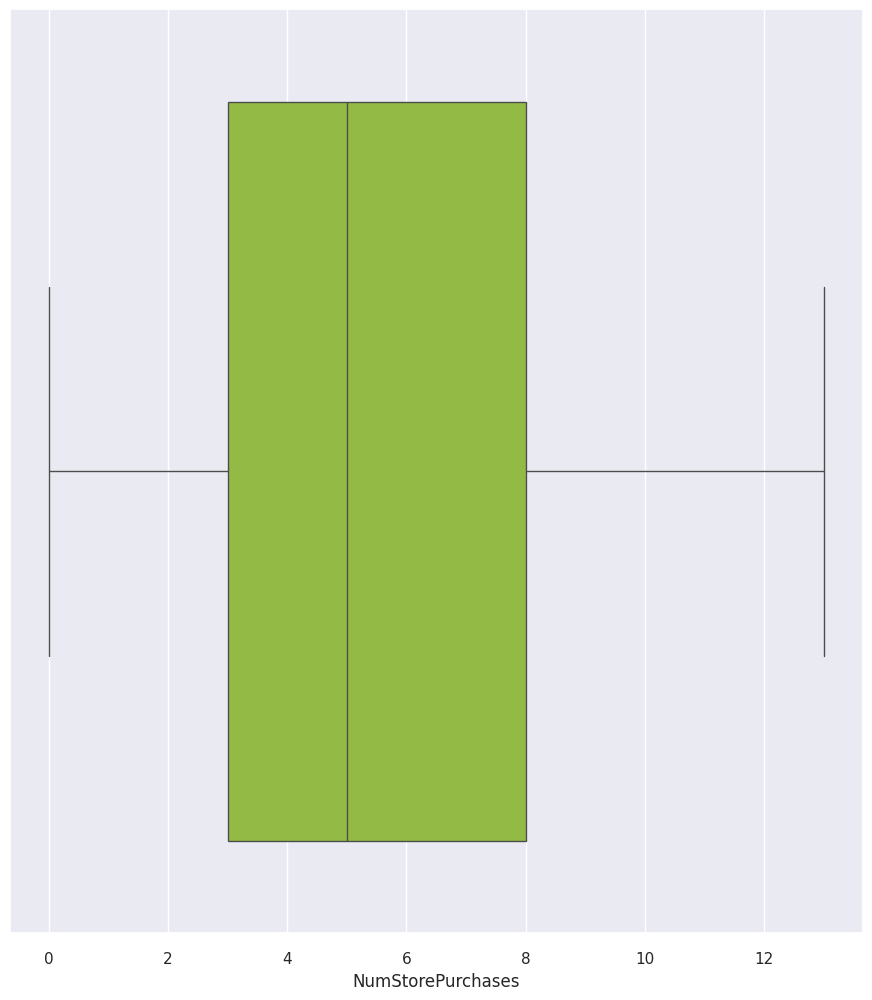

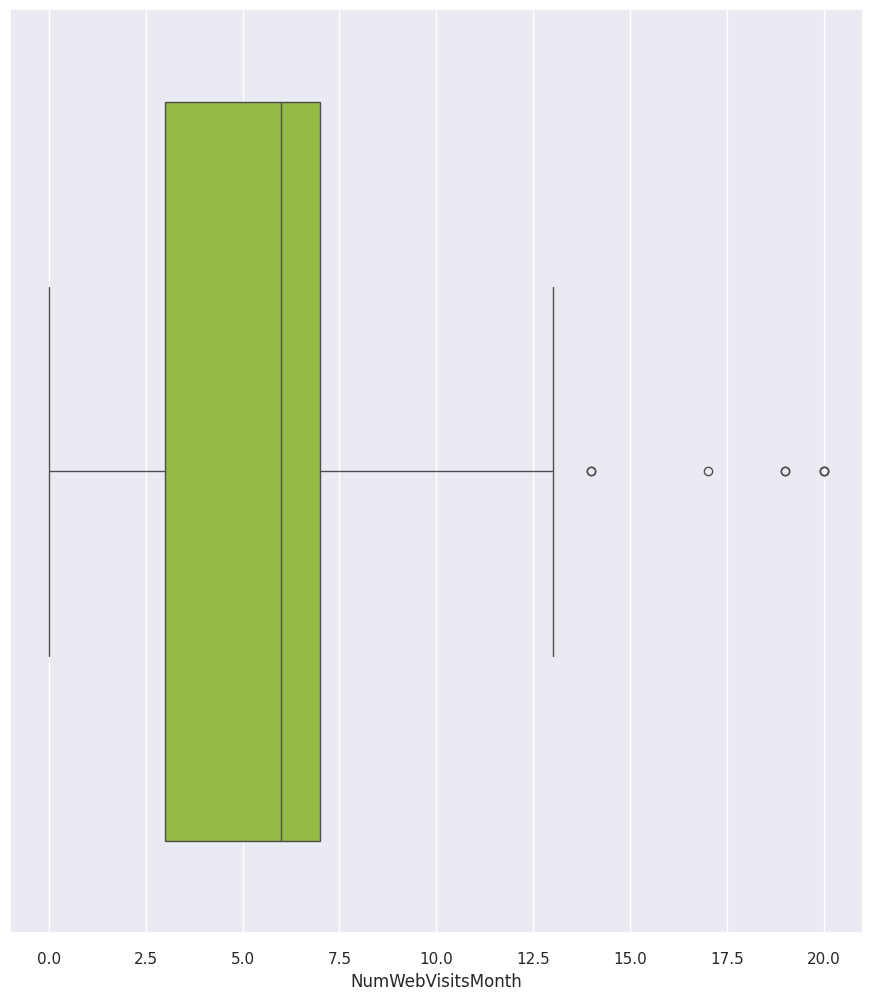

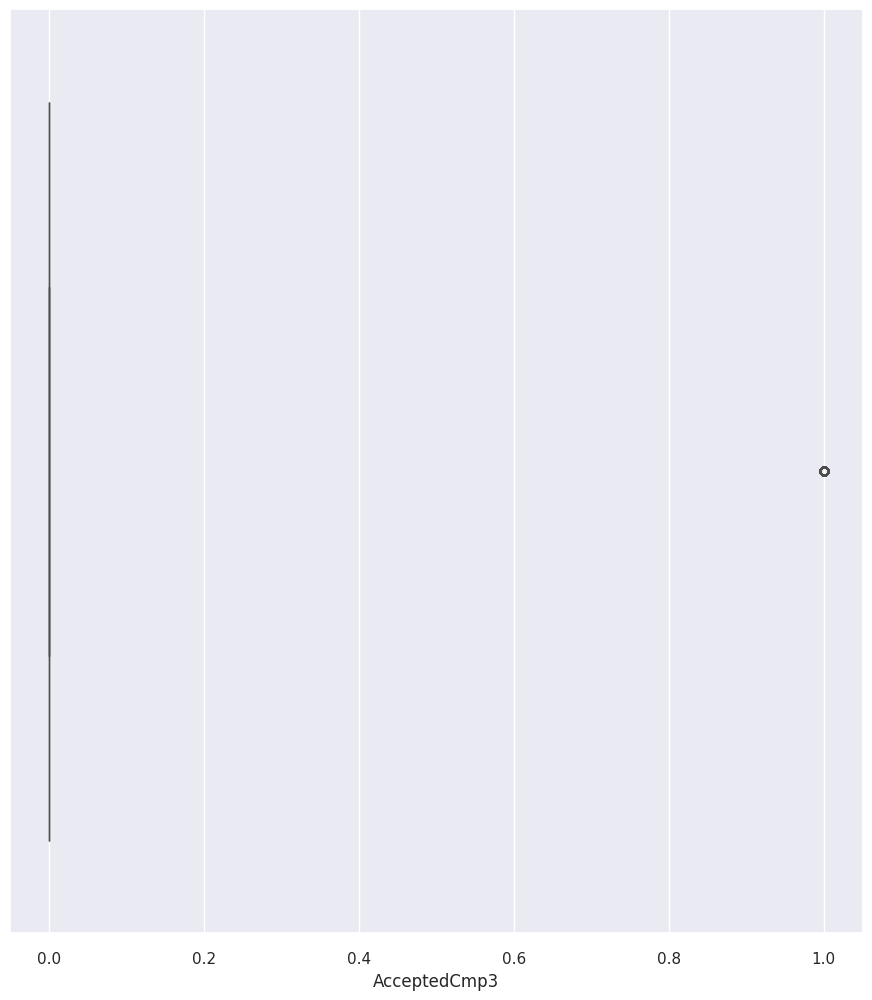

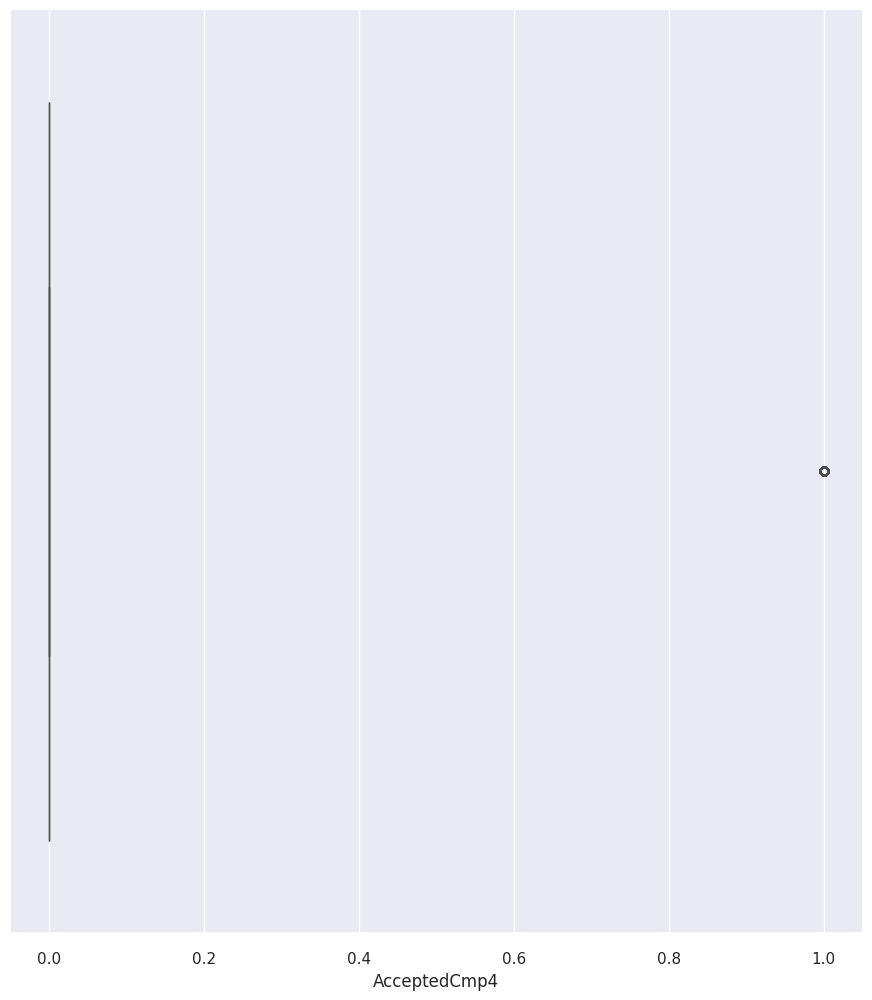

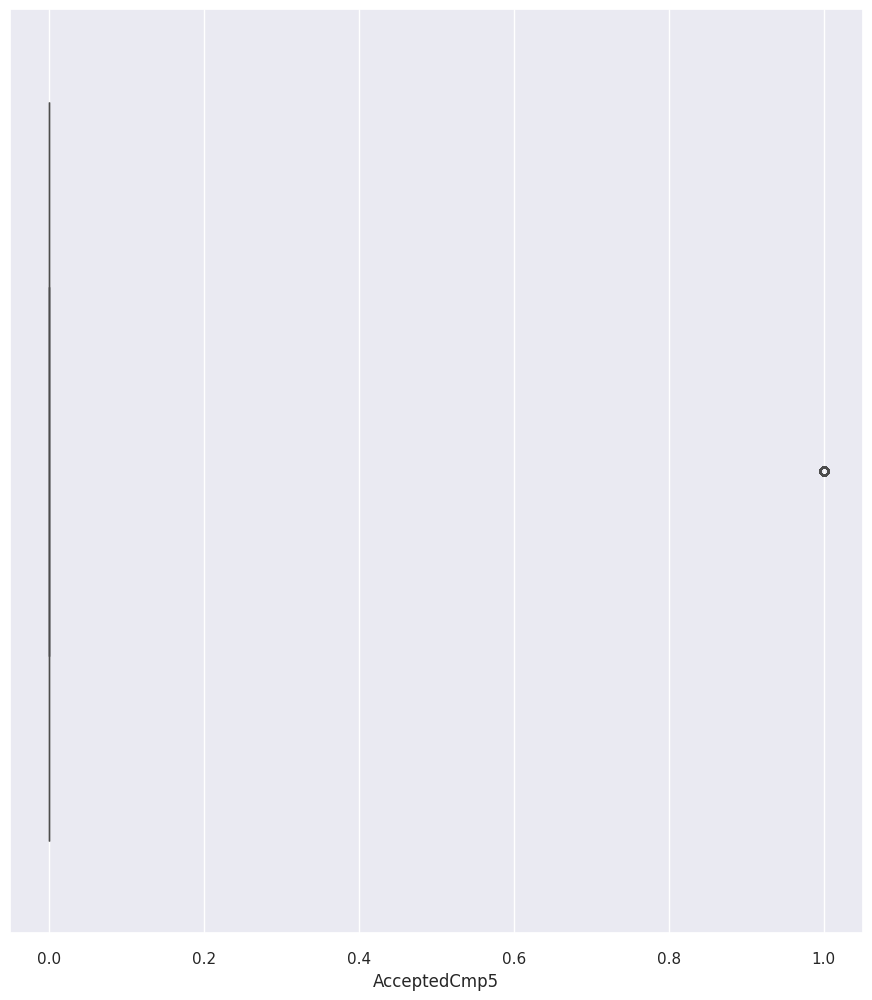

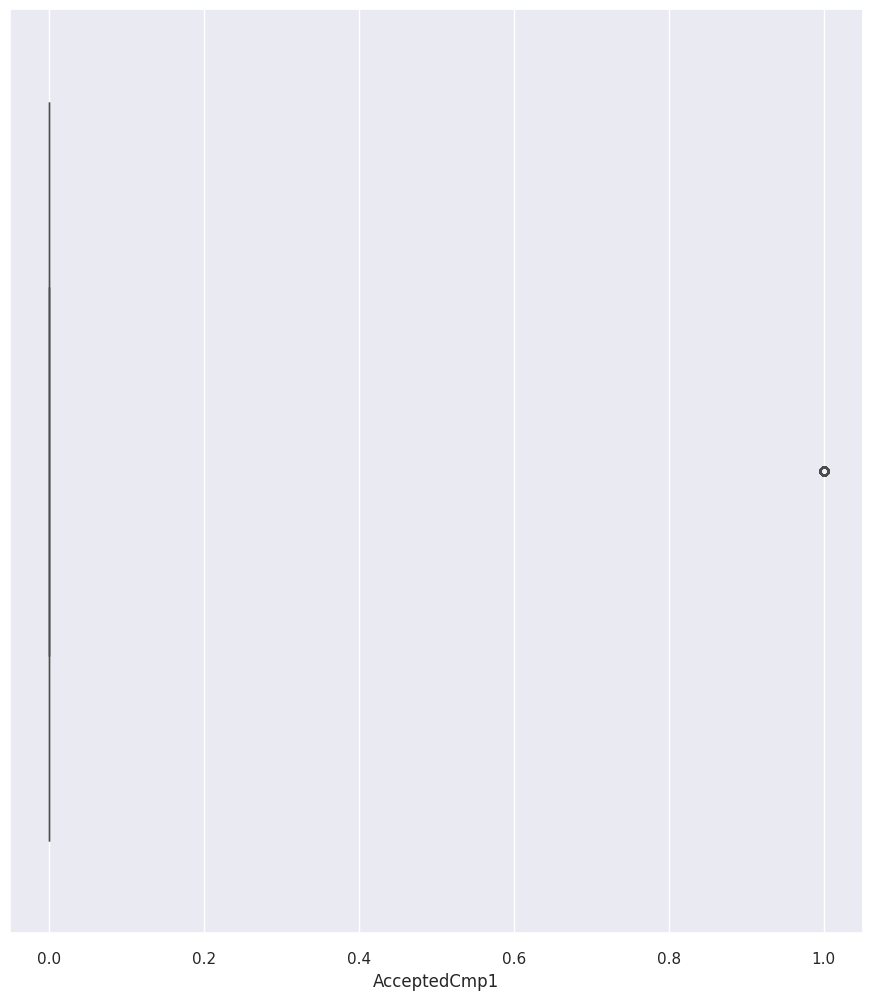

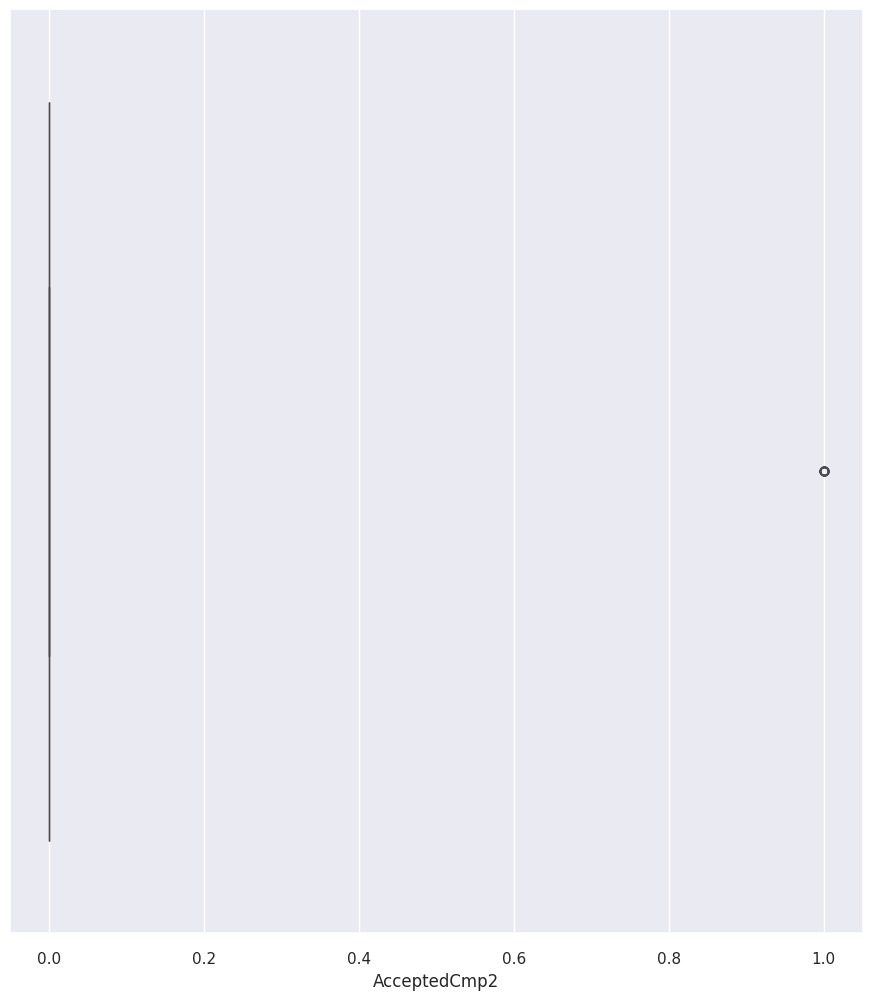

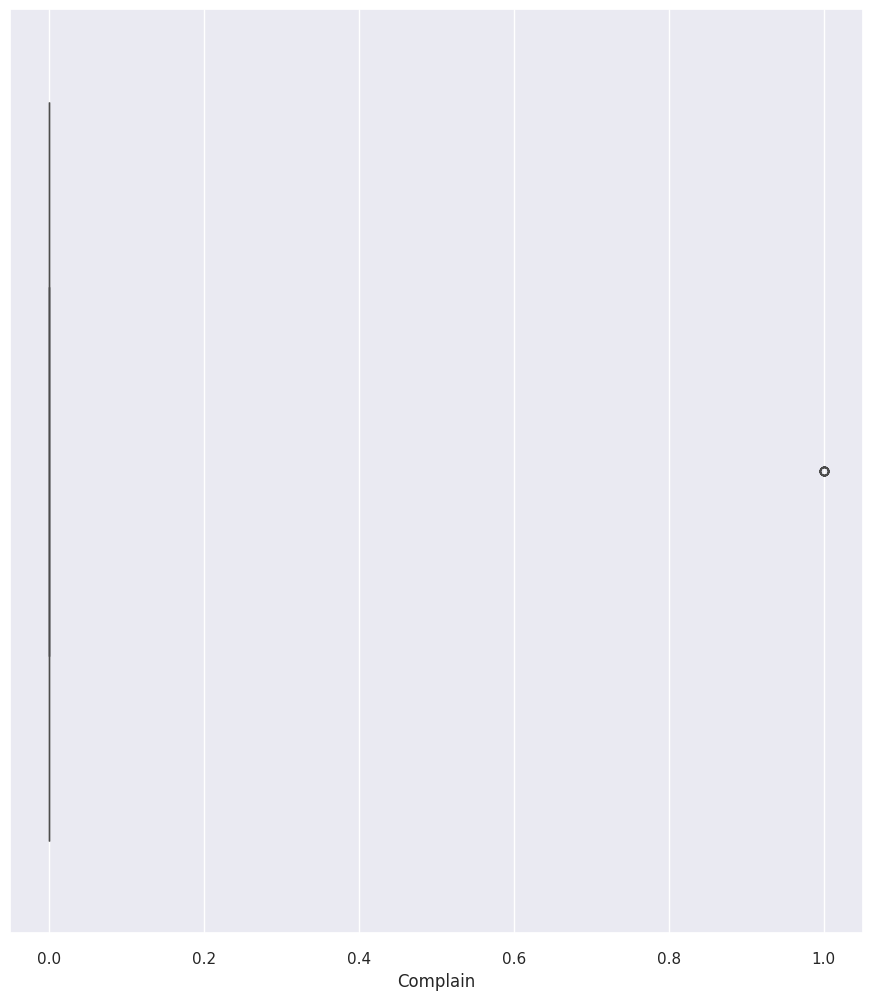

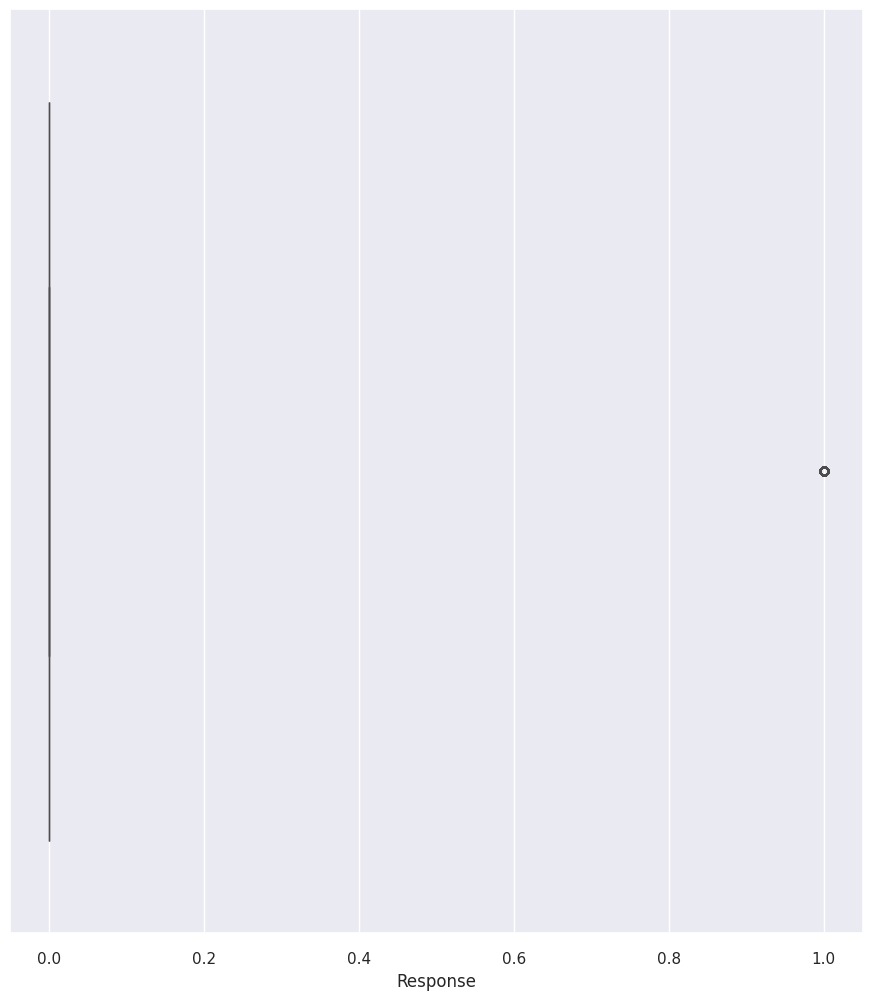

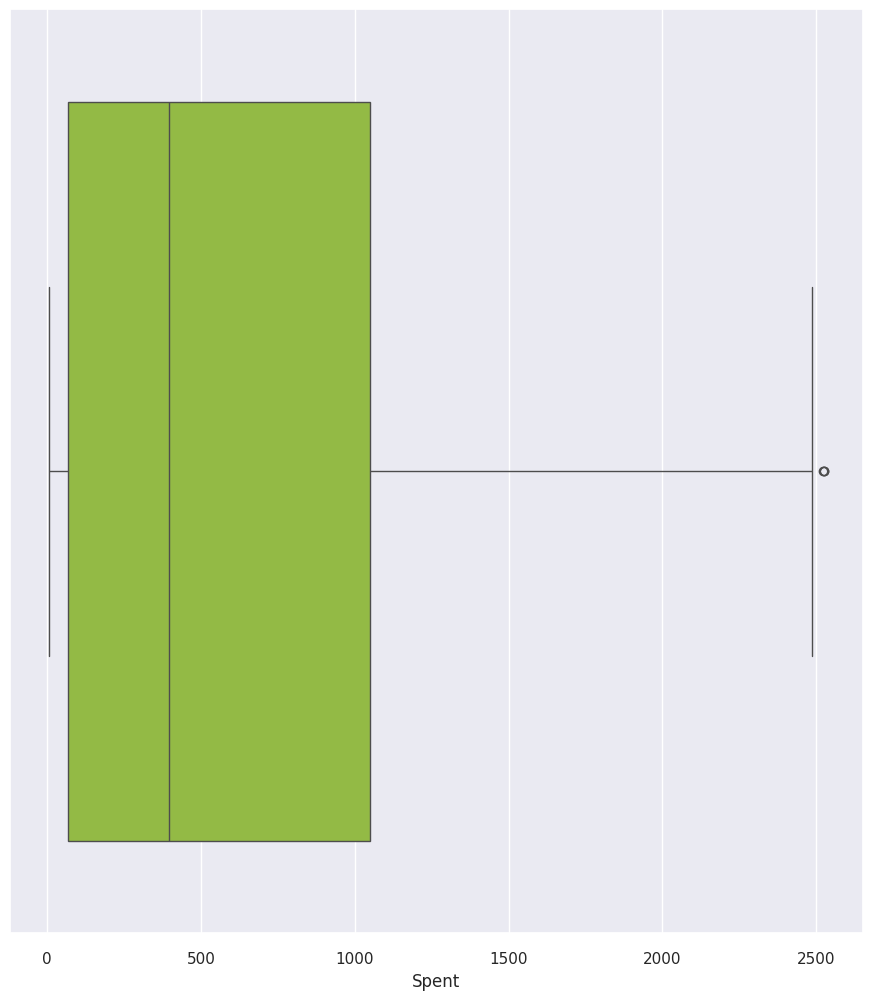

In [43]:
y = df.drop(['Education','Marital_Status','Dt_Customer'],axis = 1)
for i in y.columns:
    sns.boxplot(x = i, data = y,color = 'yellowgreen')
    plt.xlabel(i)
    plt.show()

## **Data Preprocessing**

### Count of ouliers using using IQR method

In [44]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in y.columns:
    count_outliers(df,i)

No outliers in ID
There are outliers in Age
Count of outliers are: 3
There are outliers in Income
Count of outliers are: 8
No outliers in Kidhome
No outliers in Teenhome
No outliers in Recency
There are outliers in MntWines
Count of outliers are: 35
There are outliers in MntFruits
Count of outliers are: 246
There are outliers in MntMeatProducts
Count of outliers are: 174
There are outliers in MntFishProducts
Count of outliers are: 222
There are outliers in MntSweetProducts
Count of outliers are: 246
There are outliers in MntGoldProds
Count of outliers are: 205
There are outliers in NumDealsPurchases
Count of outliers are: 84
There are outliers in NumWebPurchases
Count of outliers are: 3
There are outliers in NumCatalogPurchases
Count of outliers are: 23
No outliers in NumStorePurchases
There are outliers in NumWebVisitsMonth
Count of outliers are: 8
There are outliers in AcceptedCmp3
Count of outliers are: 163
There are outliers in AcceptedCmp4
Count of outliers are: 164
There are outl

### Encoding

In [45]:
LE=LabelEncoder()
for i in obj:
    df[i]=df[[i]].apply(LE.fit_transform)
df['Dt_Customer']=df[['Dt_Customer']].apply(LE.fit_transform)

In [46]:
df.dtypes

,0
ID,int64
Age,int64
Education,int64
Marital_Status,int64
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,int64
Recency,int64
MntWines,int64


## **Analysis Using Groupby**

In [47]:
df1 = df.groupby('Age').agg({ 'Education' : 'count', 'Marital_Status' : 'count', 'Income':'mean', 'Kidhome' : 'count',
       'Teenhome' : 'count',  'Recency':'mean',
        'NumDealsPurchases' : 'mean', 'NumWebPurchases' : 'mean',
       'NumCatalogPurchases' : 'mean', 'NumStorePurchases' : 'mean', 'NumWebVisitsMonth' : 'mean',
        'Complain' : 'sum', 'Response' : 'sum', 'Spent' : 'mean'})
df1

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Spent
Age,,,,,,,,,,,,,,
25,2,2,10960.500000,2,2,52.500000,2.000000,2.000000,0.500000,2.500000,7.000000,0,1,69.000000
26,5,5,60937.000000,5,5,51.600000,1.000000,2.800000,4.800000,7.200000,4.200000,1,1,761.200000
27,3,3,85449.333333,3,3,31.666667,1.000000,5.000000,4.666667,9.333333,3.333333,0,1,1457.333333
28,5,5,74139.800000,5,5,53.800000,1.000000,4.400000,6.800000,5.800000,1.600000,0,2,1191.200000
29,13,13,47830.153846,13,13,45.923077,1.461538,3.153846,3.384615,5.153846,5.230769,0,1,685.538462
30,15,15,60900.333333,15,15,46.000000,2.000000,4.066667,4.466667,6.800000,4.666667,0,4,1112.333333
31,18,18,40919.277778,18,18,41.500000,1.444444,3.444444,2.000000,4.666667,6.000000,0,4,532.000000
32,29,29,42250.172414,29,29,50.000000,1.793103,2.724138,2.034483,5.620690,5.103448,0,1,426.689655
33,29,29,47947.758621,29,29,52.965517,1.758621,3.413793,2.827586,5.793103,5.137931,1,2,720.068966


In [49]:
# gropubu analysis using education
df2 = df.groupby('Education').agg({ 'Age' : 'mean', 'Education' : 'count', 'Marital_Status' : 'sum', 'Income':'mean', 'Kidhome' : 'count',
       'Teenhome' : 'count',  'Recency':'mean',
        'NumDealsPurchases' : 'mean', 'NumWebPurchases' : 'mean',
       'NumCatalogPurchases' : 'mean', 'NumStorePurchases' : 'mean', 'NumWebVisitsMonth' : 'mean',
        'Complain' : 'sum', 'Response' : 'sum', 'Spent' : 'mean'})
df2

#Graduation     2
#PhD            4
#Master         3
#2n Cycle       0
#Basic          1

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Spent
Education,,,,,,,,,,,,,,,
0,48.970000,200,740,47633.190000,200,200,48.510000,2.260000,3.765000,2.355000,5.560000,5.460000,4,22,494.930000
1,43.537037,54,210,20306.259259,54,54,48.444444,1.796296,1.888889,0.481481,2.851852,6.870370,0,2,81.796296
2,51.363799,1116,4145,52720.373656,1116,1116,49.879928,2.311828,4.115591,2.738351,5.841398,5.284946,14,152,621.686380
3,54.052055,365,1365,52917.534247,365,365,47.317808,2.424658,4.035616,2.545205,5.887671,5.205479,2,56,609.767123
4,54.956341,481,1797,56145.313929,481,481,48.559252,2.359667,4.432432,2.987526,6.072765,5.251559,1,101,676.733888


### From above groupby agg we can say that, many number of them in graduatrion and avereage monry spent by them is also high average money spent by basic is low among all and their income is also low income of PhD is more among all

In [50]:
px.bar(data_frame=df2.drop(['Income','Marital_Status'],axis = 1), barmode='group',
       title = "<b>Education wise Analyzing</b>",template="plotly_dark")
# droping income,marital status  since they have lagrge value
# PhD spent more tha any other in last 2 years

In [51]:
px.bar(data_frame=df2[['Income','Marital_Status']], barmode='group',
       title = "<b>Education wise Analyzing</b>",template="plotly_dark")
# income for phD are more

In [52]:
df3 = df.groupby('Marital_Status').agg({ 'Age' : 'mean', 'Education' : 'count', 'Marital_Status' : 'sum', 'Income':'mean', 'Kidhome' : 'count',
       'Teenhome' : 'count',  'Recency':'mean',
        'NumDealsPurchases' : 'mean', 'NumWebPurchases' : 'mean',
       'NumCatalogPurchases' : 'mean', 'NumStorePurchases' : 'mean', 'NumWebVisitsMonth' : 'mean',
        'Complain' : 'sum', 'Response' : 'sum', 'Spent' : 'mean'})
df3

#Married       3
#Together      5
#Single        4
#Divorced      2
#Widow         6
#Alone         1
#YOLO          7
#Absurd        0

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Spent
Marital_Status,,,,,,,,,,,,,,,
0,46.000000,2,0,72365.500000,2,2,53.000000,2.000000,3.500000,7.500000,6.500000,1.500000,0,1,1192.500000
1,48.000000,3,3,43789.000000,3,3,30.333333,3.666667,5.000000,0.666667,4.000000,6.333333,0,1,256.666667
2,54.724138,232,464,52834.228448,232,232,49.487069,2.435345,4.310345,2.672414,5.818966,5.487069,2,48,610.629310
3,51.431739,857,2571,51724.978996,857,857,48.310385,2.382730,4.085181,2.630105,5.849475,5.355893,8,98,591.464411
4,49.428875,471,1884,50995.350318,471,471,49.199575,2.131635,3.851380,2.632696,5.677282,5.280255,6,106,612.592357
5,53.253054,573,2865,53245.534031,573,573,49.989529,2.328098,4.102967,2.678883,5.755672,5.277487,5,60,608.846422
6,62.236842,76,456,56481.552632,76,76,48.802632,2.355263,4.618421,3.302632,6.355263,4.934211,0,18,727.960526
7,48.000000,2,14,48432.000000,2,2,3.000000,5.000000,7.000000,1.000000,6.000000,8.000000,0,1,424.000000


In [53]:
px.bar(data_frame=df3.drop(['Income','Marital_Status','Spent'],axis = 1), barmode='group',
       title = "<b>Marital status wise Analyzing</b>",template="plotly_dark")
# more number of kids at home for married and they are doing education
# average age of widow is more
# average recency of absurd is more

In [54]:
px.bar(data_frame=df3[['Income','Spent']], barmode='group',
       title = "<b>Marital_Status wise Analyzing</b>",template="plotly_dark")
# average income of widow is more
# money spent by absurd is more

## **Feature Scaling**

In [55]:
del_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = df.drop(del_cols, axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_features = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [56]:
scaled_features.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent
0,-0.019809,0.986443,-0.350527,0.254218,0.234063,-0.823039,-0.928972,-1.307032,0.310532,0.978226,...,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,1.675488
1,-1.051009,1.236801,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.901325,-0.380509,-0.872024,...,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.962358
2,-0.445526,0.318822,-0.350527,1.182303,0.769478,-0.823039,-0.928972,0.610855,-0.795134,0.358511,...,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.280250
3,0.182737,-1.266777,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.680031,-0.795134,-0.872024,...,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.919224
4,-0.081373,-1.016420,1.429011,-0.673866,0.240221,1.039938,-0.928972,0.326333,1.554407,-0.391671,...,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.307044


## **Dimensionality reduction using PCA**

In [57]:
#Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets,
#increasing interpretability but at the same time minimizing information loss.
pca = PCA(n_components=3)
pca.fit(scaled_features)
PCA_df = pd.DataFrame(pca.transform(scaled_features), columns=(["Education","Income", "Kidhome"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2216.0,-2.565136e-17,2.641535,-5.099292,-2.450163,-0.657612,2.306213,7.140269
Income,2216.0,4.488988e-17,1.420520,-3.092275,-1.132640,-0.145821,1.020987,4.872661
Kidhome,2216.0,-1.923852e-17,1.164396,-4.439933,-0.784221,0.001538,0.700145,5.425355


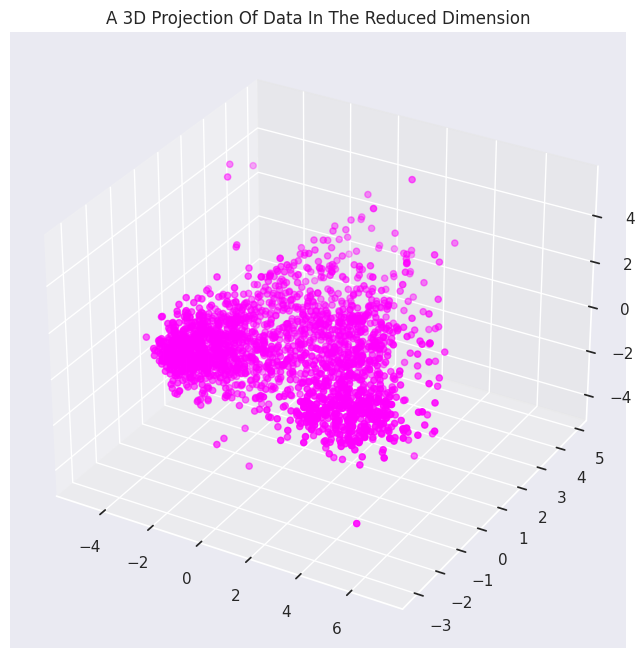

In [58]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["Education"]
y =PCA_df["Income"]
z =PCA_df["Kidhome"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="magenta", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [62]:
!pip install kneed

## **K-Means Clustering**

In [63]:
from kneed import KneeLocator

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(PCA_df)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

In [64]:
wcss

[22928.351768897814,
 10637.412624821796,
 7393.938970384921,
 6283.7657705949105,
 5489.884652717984,
 4894.33531465801,
 4366.851189770081,
 4019.5244192374016,
 3758.3890455900237,
 3548.617595014629]

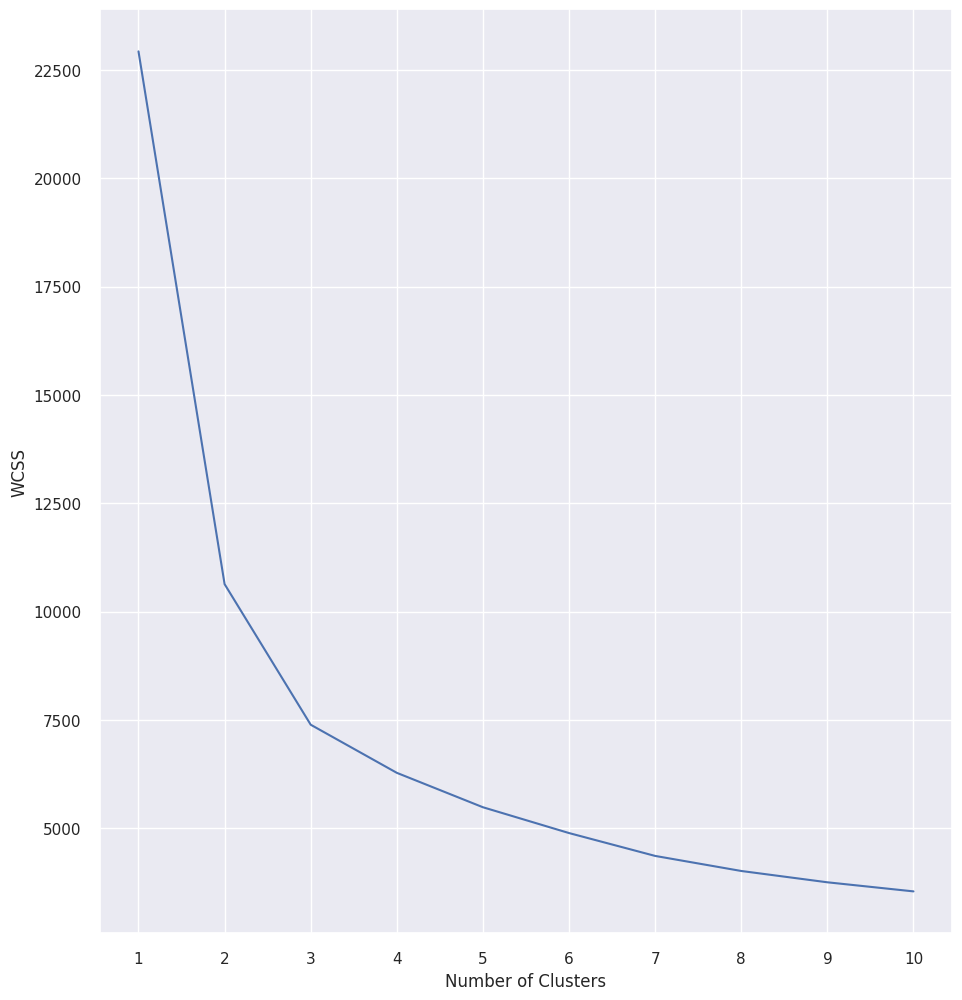

In [65]:
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [66]:
# Find the knee point using KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
optimal_k = kl.knee
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 3


In [67]:
# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++')
kmeans.fit(PCA_df)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



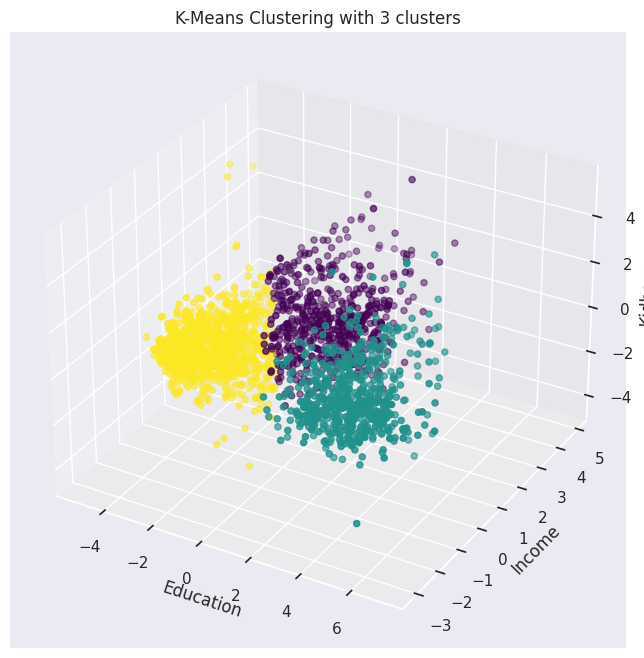

In [68]:
# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_df["Education"], PCA_df["Income"], PCA_df["Kidhome"], c=labels, cmap='viridis')
ax.set_xlabel('Education')
ax.set_ylabel('Income')
ax.set_zlabel('Kidhome')
plt.title(f"K-Means Clustering with {optimal_k} clusters")
plt.show()

In [69]:
# Calculate Silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(PCA_df, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.42


## **Hierarchical Clustering**

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [71]:
# Perform Hierarchical Clustering
Z = linkage(PCA_df, 'ward')

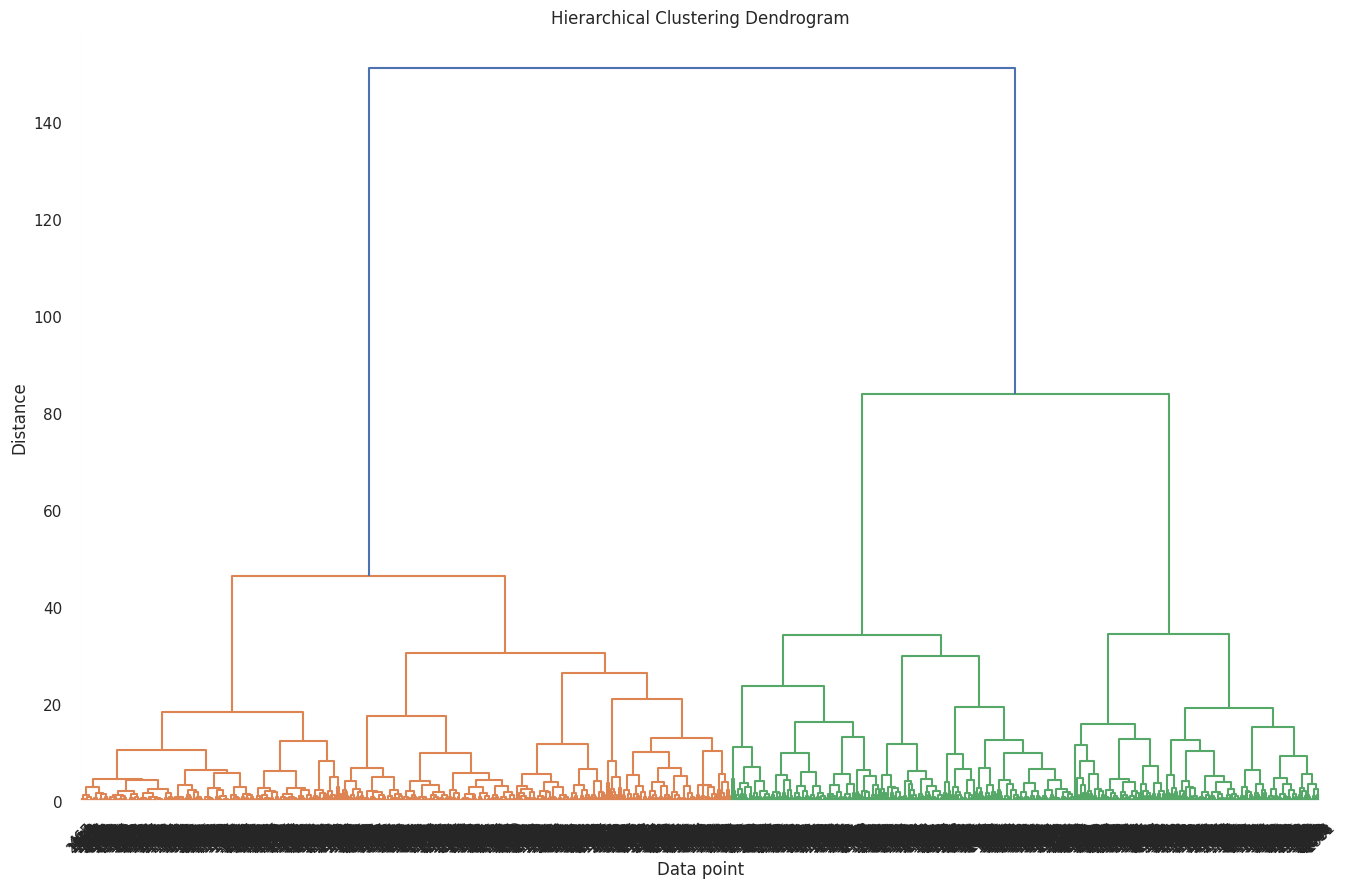

In [88]:
plt.figure(figsize=(16, 10))
dendrogram(Z, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()

In [80]:
# Determine the optimal number of clusters
from kneed import KneeLocator
distances = [Z[i][2] for i in range(len(Z)-1)]
# The range of x should match the length of distances
kl = KneeLocator(range(1, len(distances)+1), distances, curve="convex", direction="decreasing")
optimal_k = kl.knee
# Ensure that the optimal number of clusters is at least 2
optimal_k = max(2, optimal_k)
print(f"Optimal number of clusters: {int(optimal_k)}")

Optimal number of clusters: 2


In [81]:
# Perform Hierarchical Clustering with the optimal number of clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=int(optimal_k), affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(PCA_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



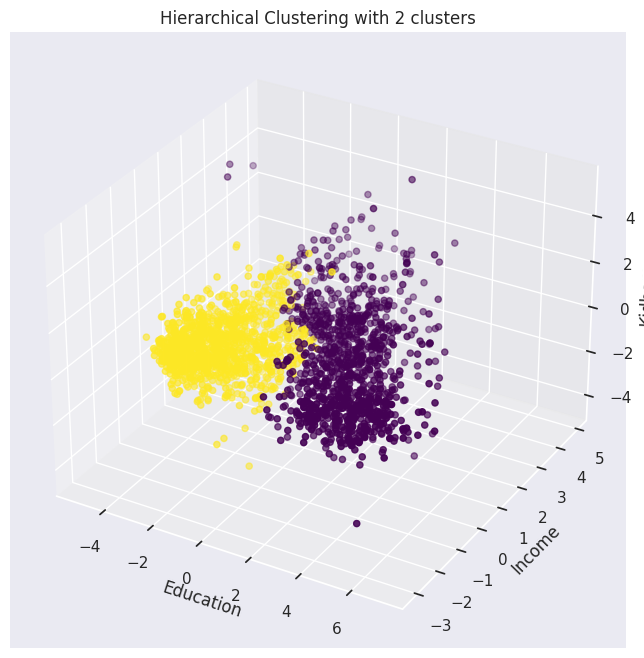

In [82]:
# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_df["Education"], PCA_df["Income"], PCA_df["Kidhome"], c=hc_labels, cmap='viridis')
ax.set_xlabel('Education')
ax.set_ylabel('Income')
ax.set_zlabel('Kidhome')
plt.title(f"Hierarchical Clustering with {int(optimal_k)} clusters")
plt.show()


In [83]:
# Calculate Silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(PCA_df, hc_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.44


## **DBSCAN Clustering**

In [84]:
from sklearn.cluster import DBSCAN

In [85]:
# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(PCA_df)

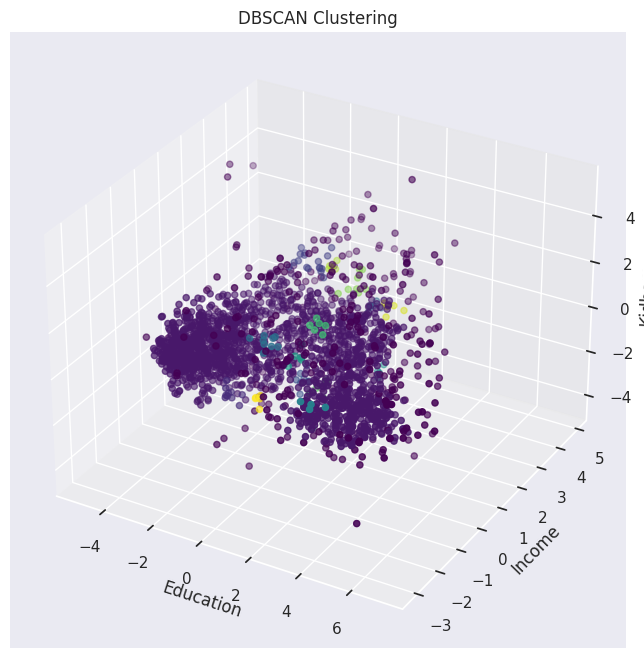

In [86]:
# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_df["Education"], PCA_df["Income"], PCA_df["Kidhome"], c=dbscan_labels, cmap='viridis')
ax.set_xlabel('Education')
ax.set_ylabel('Income')
ax.set_zlabel('Kidhome')
plt.title("DBSCAN Clustering")
plt.show()

In [87]:
# Calculate Silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(PCA_df, dbscan_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: -0.43
